# Cynthia Kielpinski

## Research Interests:

By majoring in statistics, I have always had a passion for the process behind statistics. The collection of data, the wrangling and processing of the data, exploratory analysis of the data, interpreting the analysis, and then finalizing the process by formulating a conclusion from the analysis. One fundamental ideal in statistics I have learned is that without an interdiscplinary field, you do not have the data and you are simply performing pure statistics. As per this comment, I have never found interest in pure statistics thus I found a passion in the interdisciplinary field of ecology and environmental sciences. For this project, my research interests are focus on exploratory statistics (required) and an environmental or ecological factor. Environmental data is more prominent  than ecological from my persepctive thus I have decided to focus on an environmental influence. Since our group decided on using a summer and winter Olympics dataset, I though to refine my first research question to involve different countries performance in the summer and winter olympics influenced by their "local" climate. Competition is always a profound topic, and additionally if there is need for an additional research question I was also interested in how countries perform in their home country versus a visiting country. 

## Research Question: (updated: 03-01-2023)

1. **Does the annual average temperature of a country determine a correlation between the probability or likelihood of preforming more successfully in the summer or winter Olympics in individual disciplines?** 

I have decided to use a Bernoulli distribution as the designation for "hot" (1) and "cold" (0) climates. I used the annual temperature column to calculate the overall average annual temperature for all the countries in the dataset to determine a "threshold" for determining if a country is "hot" and "cold" by using a Bernoulli distribution. For example, does Canada have a better probability of winning medals in the winter Olympics since it is considered to be a cold climate according to my Bernoulli distribution? Does Brazil have a better probability of winning medals in the summer Olympics since it is in the hot designation? Or is there no correlation between a countries climate classification and which Olympics the country preforms better in? I will explore the correlations between countries and their climates in regards to number of medals won in each of the respective summer or winter Olympic events. Overall, to answer this research question, my main form of analysis will be a multiple linear regression using categorical(dummy) variables and quantitative variables.

## Exploratory Data Analysis Plan: (updated: 03-01-2023)

To determine some answers into starting to answer my research question, I will use descriptive and exploratory techniques such as... Some of my ideas for more advanced analyses are: multiple linear regression analysis, and potentially using principal component analysis. From briefly looking over the datasets, the above methods are a brief thought to the possibilities when exploring the data. After wrangling the data, I will define the specific analyses methods I choose to use. I have a background in Statistics, thus deciding what analyses will be used at a later stage will be an simplistic decision. 

I will complete as little wrangling as needed, but I have visioned the data to be cleaner and more orderly without taking hours on wrangining. I think my current plan is to edit/wrangle each dataset, and then merge all of the separate datasets together so I have one uniform dataset to work with. I will change some column names for ease of analyses, and try to keep everything simplistic. Some columns I am thinking of adding as of now are: total number of medals won, total number of gold, silver and bronze medals won, and maybe dome column for a way to rank the total number of "points" won to easily compute standings.

## Import Packages: (all packages needed for analysis, updated: 03-04-2023)

In [1]:
## Import Packages:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc

import seaborn as sns
sns.set_theme(style="ticks")

In [2]:
## Data Upload:
OlympicHost = pd.read_csv("../../data/raw/Olympic_Summer_Winter_Games_1986-2022/olympic_hosts.csv")

OlympicMedals = pd.read_csv("../../data/raw/Olympic_Summer_Winter_Games_1986-2022/olympic_medals.csv")

GDPCountry = pd.read_csv("../../data/raw/GDPbyCountry.csv")

HistTemp = pd.read_csv("../../data/raw/HistoricalTemperatureData.csv")

#### Notes: About the Historical Temperature Data and the GDP Datasets

The following links are from the World Bank Website which has the following license as described below. 

[Historical Average Temperature Data per Country](https://datacatalog.worldbank.org/search/dataset/00402760) (For whatever reason, this link no longer exists?!?! I have no idea why??)

[Gross Domestic Product Data:](https://data.worldbank.org/indicator/NY.GDP.MKTP.CD)

By looking into the licenses for the data from the [World Bank Website](https://www.worldbank.org/en/about/legal/terms-of-use-for-datasets) it quotes that the license "[u]nless specifically labeled otherwise, these Datasets are provided to you under a Creative Commons Attribution 4.0 International License (CC BY 4.0), with the additional terms below."


## Initial Edits and Observations: 

In [3]:
## Drop columns not needed for analysis:
OlympicHost1 = OlympicHost.drop(columns=["game_end_date", "game_start_date"])
OlympicHost1

,game_slug,game_location,game_name,game_season,game_year
0,beijing-2022,China,Beijing 2022,Winter,2022
1,tokyo-2020,Japan,Tokyo 2020,Summer,2020
2,pyeongchang-2018,Republic of Korea,PyeongChang 2018,Winter,2018
3,rio-2016,Brazil,Rio 2016,Summer,2016
4,sochi-2014,Russian Federation,Sochi 2014,Winter,2014
5,london-2012,Great Britain,London 2012,Summer,2012
6,vancouver-2010,Canada,Vancouver 2010,Winter,2010
7,beijing-2008,China,Beijing 2008,Summer,2008
8,turin-2006,Italy,Turin 2006,Winter,2006
9,athens-2004,Greece,Athens 2004,Summer,2004


In [101]:
## Drop columns not needed for analysis:
OlympicMedals = OlympicMedals.drop(columns=["athlete_url", "athlete_full_name","participant_title","country_code"])

In [102]:
## Rename columns so they match other datasets:
OlympicMedals = OlympicMedals.rename(columns={"discipline_title": "discipline", "slug_game": "game_slug","event_title": "event","event_gender": "event_sex",
                             "medal_type": "medal_type","participant_type": "participant_type","country_name": "country","country_3_letter_code": "country_code"})

In [103]:
## Select only "Athlete" events:
## I am not entirely sure how to "deal" with "TeamGame" since they "win" X amount of G,S,B medals per event, but the Olympics scores it still as 3,2,1 for G,S,B.
OlympicMedals = OlympicMedals[OlympicMedals["participant_type"] == "Athlete"]

## Establish Point Values:
point_value = []
for row in OlympicMedals["medal_type"]:
        if row == "GOLD" :    point_value.append(3)
        elif row == "SILVER" :  point_value.append(2)
        else:           point_value.append(1)
        
OlympicMedals["point_value"] = point_value
OlympicMedals.head(10)

,discipline,game_slug,event,event_sex,medal_type,participant_type,country,country_code,point_value
0,Taekwondo,london-2012,58 - 68 kg men,Men,BRONZE,Athlete,Afghanistan,AFG,1
1,Taekwondo,beijing-2008,Beijing 2008 Taekwondo - 58 kg men,Men,BRONZE,Athlete,Afghanistan,AFG,1
2,Sailing,seoul-1988,Division II - Windsurfer men,Open,SILVER,Athlete,Netherlands Antilles,AHO,2
3,Athletics,rio-2016,800m men,Men,SILVER,Athlete,Algeria,ALG,2
4,Athletics,rio-2016,1500m men,Men,SILVER,Athlete,Algeria,ALG,2
5,Athletics,london-2012,1500m men,Men,GOLD,Athlete,Algeria,ALG,3
6,Judo,beijing-2008,48 52kg halflightweight women,Women,BRONZE,Athlete,Algeria,ALG,1
7,Judo,beijing-2008,81 90kg middleweight men,Men,SILVER,Athlete,Algeria,ALG,2
8,Athletics,sydney-2000,800m men,Men,BRONZE,Athlete,Algeria,ALG,1
9,Athletics,sydney-2000,1500m women,Women,GOLD,Athlete,Algeria,ALG,3


In [104]:
## Just renaming cleaned dataset into new one.
OlympicMedals1 = OlympicMedals

In [105]:
## Renaming and dropping columns in the historical temperature dataset:
HistTemp = HistTemp.rename(columns = {"ISO_3DIGIT": "WRONG_country_code", "Jan_Temp": "Jan_temp", 
                                      "Apr_Temp": "Apr_temp", "Jun_Temp": "Jun_temp", "July_Temp":"July_temp",
                                      "Aug_Temp": "Aug_temp", "Nov_Temp": "Nov_temp"})

HistTemp1 = HistTemp.drop(columns=["country", "WRONG_country_code", "Jan_temp", "Feb_temp", "Mar_temp", "Apr_temp", "May_temp", "Jun_temp",
                                 "July_temp", "Aug_temp", "Sept_temp", "Oct_temp", "Nov_temp", "Dec_temp"])

In [106]:
## Mean Temp: 17.965506 degrees celsius
MeanTemp = HistTemp1[["Annual_temp"]].mean()

## Dummy Variable: Categorical (1: Hot, 0: Cold)
hot_cold = []
for row in HistTemp1["Annual_temp"]:
        if row > 17.95 :    hot_cold.append(1)
        else:           hot_cold.append(0)
        
HistTemp1["hot_cold"] = hot_cold
HistTemp1.head(5)

,country_code,Annual_temp,hot_cold
0,AFG,12.92,0
1,AGO,21.51,1
2,ALB,11.27,0
3,UAE,26.83,1
4,ARG,14.22,0


In [107]:
## This data set is going to need a bit of wrangling... (HUGE YIKES -_-)
GDPCountry = GDPCountry.drop([0,2])
GDPCountry = GDPCountry.drop([1])
GDPCountry = GDPCountry.drop(columns=["Unnamed: 3"])
GDPCountry = GDPCountry.drop([3])

In [108]:
## Remame all the columns:
GDPCountry = GDPCountry.rename(columns = {"Data Source": "country_name", "World Development Indicators": "country_code", 
                                          "Unnamed: 2": "GDP", "Unnamed: 4": "1960", "Unnamed: 5": "1961", "Unnamed: 6": "1962",
                                          "Unnamed: 7": "1963", "Unnamed: 8": "1964", "Unnamed: 9": "1965", "Unnamed: 10": "1966",
                                          "Unnamed: 11": "1967", "Unnamed: 12": "1968", "Unnamed: 13": "1969", "Unnamed: 14": "1970",
                                          "Unnamed: 15": "1971","Unnamed: 16": "1972","Unnamed: 17": "1973","Unnamed: 18": "1974",
                                          "Unnamed: 19": "1975","Unnamed: 20": "1976","Unnamed: 21": "1977","Unnamed: 22": "1978",
                                          "Unnamed: 23": "1979","Unnamed: 24": "1980","Unnamed: 25": "1981","Unnamed: 26": "1982",
                                          "Unnamed: 27": "1983","Unnamed: 28": "1984","Unnamed: 29": "1985","Unnamed: 30": "1986",
                                          "Unnamed: 31": "1987","Unnamed: 32": "1988","Unnamed: 33": "1989","Unnamed: 34": "1990",
                                          "Unnamed: 35": "1991","Unnamed: 36": "1992","Unnamed: 37": "1993","Unnamed: 38": "1994",
                                          "Unnamed: 39": "1995","Unnamed: 40": "1996","Unnamed: 41": "1997","Unnamed: 42": "1998",
                                          "Unnamed: 43": "1999","Unnamed: 44": "2000","Unnamed: 45": "2001","Unnamed: 46": "2002",
                                          "Unnamed: 47": "2003","Unnamed: 48": "2004","Unnamed: 49": "2005","Unnamed: 50": "2006",
                                          "Unnamed: 51": "2007","Unnamed: 52": "2008","Unnamed: 53": "2009","Unnamed: 54": "2010",
                                          "Unnamed: 55": "2011","Unnamed: 56": "2012","Unnamed: 57": "2013","Unnamed: 58": "2014",
                                          "Unnamed: 59": "2015","Unnamed: 60": "2016","Unnamed: 61": "2017","Unnamed: 62": "2018",
                                          "Unnamed: 63": "2019","Unnamed: 64": "2020","Unnamed: 65": "2021"})

In [109]:
## Exported cleaned dataset to new CSV:
GDPCountry.to_csv("../../data/raw/New_GDP.csv")

In [110]:
## Read
NewGDP = pd.read_csv("../../data/raw/New_GDP.csv")
NewGDP=NewGDP.drop(columns=["Unnamed: 0"])

In [111]:
## Drop Nan's after dataset has been cleaned:
GDP_NONA = NewGDP.dropna()

In [112]:
## Average GDP from 1960 to 2021:
average_GDP = GDP_NONA[["1960","1961","1962","1963","1964","1965","1966","1967","1968","1969","1970","1971",
                       "1972","1973","1974","1975","1976","1977","1978","1979","1980","1981","1982",
                       "1983","1984","1985","1986","1987","1988","1989","1990", "1991","1992","1993","1994",
                       "1995","1996","1997","1998","1999","2000","2001","2002","2003","2004","2005","2006",
                        "2007","2008","2009","2010","2011","2012","2013","2014","2015",
                       "2016","2017","2018","2019","2020","2021"]].mean(axis=1)
GDP_NONA.head(10)

,country_name,country_code,GDP,1960,1961,1962,1963,1964,1965,1966,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
1,Africa Eastern and Southern,AFE,GDP (current US$),2.129081e+10,2.180870e+10,2.370727e+10,2.821034e+10,2.611906e+10,2.968249e+10,3.223946e+10,...,9.725730e+11,9.834730e+11,1.003770e+12,9.245230e+11,8.827210e+11,1.021120e+12,1.007240e+12,1.001020e+12,9.274840e+11,1.080710e+12
3,Africa Western and Central,AFW,GDP (current US$),1.040414e+10,1.112789e+10,1.194319e+10,1.267633e+10,1.383837e+10,1.486223e+10,1.583259e+10,...,7.360400e+11,8.322170e+11,8.924980e+11,7.669580e+11,6.905450e+11,6.837480e+11,7.663600e+11,7.947190e+11,7.848000e+11,8.401870e+11
13,Australia,AUS,GDP (current US$),1.860567e+10,1.968194e+10,1.992160e+10,2.153881e+10,2.379998e+10,2.597491e+10,2.730653e+10,...,1.546890e+12,1.576380e+12,1.467550e+12,1.350620e+12,1.206540e+12,1.326520e+12,1.428290e+12,1.392230e+12,1.326900e+12,1.552670e+12
14,Austria,AUT,GDP (current US$),6.592694e+09,7.311750e+09,7.756110e+09,8.374175e+09,9.169984e+09,9.994071e+09,1.088768e+10,...,4.094020e+11,4.301910e+11,4.425850e+11,3.819710e+11,3.958370e+11,4.172610e+11,4.549910e+11,4.446210e+11,4.352250e+11,4.803680e+11
16,Burundi,BDI,GDP (current US$),1.960000e+08,2.030000e+08,2.135000e+08,2.327500e+08,2.607500e+08,1.589950e+08,1.654446e+08,...,2.333341e+09,2.451607e+09,2.705783e+09,3.104004e+09,2.639321e+09,2.712324e+09,2.660124e+09,2.576519e+09,2.649672e+09,2.779813e+09
17,Belgium,BEL,GDP (current US$),1.165872e+10,1.240015e+10,1.326402e+10,1.426002e+10,1.596011e+10,1.737146e+10,1.865188e+10,...,4.961530e+11,5.217910e+11,5.353900e+11,4.623360e+11,4.760630e+11,5.027650e+11,5.432990e+11,5.358310e+11,5.252120e+11,5.941040e+11
18,Benin,BEN,GDP (current US$),2.261956e+08,2.356682e+08,2.364349e+08,2.539276e+08,2.698190e+08,2.899087e+08,3.029253e+08,...,1.114136e+10,1.251785e+10,1.328453e+10,1.138816e+10,1.182107e+10,1.270166e+10,1.426241e+10,1.439169e+10,1.565155e+10,1.714492e+10
19,Burkina Faso,BFA,GDP (current US$),3.304428e+08,3.502472e+08,3.795670e+08,3.940406e+08,4.103216e+08,4.229168e+08,4.338898e+08,...,1.256102e+10,1.344430e+10,1.394302e+10,1.183216e+10,1.283336e+10,1.410696e+10,1.589007e+10,1.617816e+10,1.793361e+10,1.973762e+10
20,Bangladesh,BGD,GDP (current US$),4.274894e+09,4.817580e+09,5.081413e+09,5.319458e+09,5.386055e+09,5.906637e+09,6.439688e+09,...,1.333560e+11,1.499900e+11,1.728850e+11,1.950790e+11,2.652360e+11,2.937550e+11,3.213790e+11,3.512380e+11,3.739020e+11,4.162650e+11
23,"Bahamas, The",BHS,GDP (current US$),1.698039e+08,1.900980e+08,2.122549e+08,2.377451e+08,2.666667e+08,3.003922e+08,3.400000e+08,...,1.072050e+10,1.056280e+10,1.117610e+10,1.186190e+10,1.183460e+10,1.235760e+10,1.275580e+10,1.319280e+10,9.699500e+09,1.120860e+10


In [113]:
## Remove the years that aren't required:
GDP = GDP_NONA.drop(columns=["GDP","1960","1961","1962","1963","1964","1965","1966","1967","1968","1969","1970","1971",
                       "1972","1973","1974","1975","1976","1977","1978","1979","1980","1981","1982",
                       "1983","1984","1985","1986","1987","1988","1989","1990", "1991","1992","1993","1994",
                       "1995","1996","1997","1998","1999","2000","2001","2002","2003","2004","2005","2006",
                        "2007","2008","2009","2010","2011","2012","2013","2014","2015",
                       "2016","2017","2018","2019","2020","2021"])
GDP.head(5)

,country_name,country_code
1,Africa Eastern and Southern,AFE
3,Africa Western and Central,AFW
13,Australia,AUS
14,Austria,AUT
16,Burundi,BDI


In [124]:
## Merge Data Sets:
Olympic1 = pd.merge(OlympicHost1, OlympicMedals1, on="game_slug")
Olympic2 = pd.merge(Olympic1, HistTemp1, on="country_code")

In [125]:
## Merge Data Sets: DO NOT DO THIS YET... CAUSES ISSUES??
## UPDATE: I think it was actually the historical temperature dataset that was causing issues not necessarily the GDP one...
## OlympicFull = pd.merge(Olympic2, GDP, on="country_code")

In [126]:
## Winter Olympics: make sure all needed columns are present!!
WinterOlympic = Olympic2[Olympic2["game_season"]== "Winter"]
WinterOlympic.head(5)  

## Beijing 2022 Olympics: used for just checking things out... 
WinterOlympicBeijing = Olympic2[Olympic2["game_slug"]== "beijing-2022"]

In [127]:
## Number of Gold Per Country: WINTER 
WinterGold = WinterOlympic[WinterOlympic["medal_type"]=="GOLD"]
GoldLine = WinterGold["country"].unique()
GoldPerCountry = WinterGold[["country", "medal_type"]].groupby("country",as_index=False).count()
GoldPerCountry = GoldPerCountry.sort_values("medal_type", ascending=False)

In [128]:
## Number of Silver Per Country: WINTER
WinterSilver = WinterOlympic[WinterOlympic["medal_type"]=="SILVER"]
SilverLine = WinterSilver["country"].unique()
SilverPerCountry = WinterSilver[["country", "medal_type"]].groupby("country",as_index=False).count()
SilverPerCountry = SilverPerCountry.sort_values("medal_type", ascending=False)

In [129]:
## Number of Bronze Per Country: WINTER
WinterBronze = WinterOlympic[WinterOlympic["medal_type"]=="BRONZE"]
BronzeLine = WinterBronze["country"].unique()
BronzePerCountry = WinterBronze[["country", "medal_type"]].groupby("country",as_index=False).count()
BronzePerCountry = BronzePerCountry.sort_values("medal_type", ascending=False)

In [138]:
## Total Points by Country: WINTER
TotalPointsCountry = WinterOlympic[["country", "point_value"]].groupby("country",as_index=False).sum()
TotalPointsCountry = TotalPointsCountry.sort_values("point_value", ascending=False)

In [131]:
## Summer Olympics:
SummerOlympic = Olympic2[Olympic2["game_season"]== "Summer"]
SummerOlympic.head(5)

,game_slug,game_location,game_name,game_season,game_year,discipline,event,event_sex,medal_type,participant_type,country,country_code,point_value,Annual_temp,hot_cold
4,tokyo-2020,Japan,Tokyo 2020,Summer,2020,Diving,Women's 10m Platform,Women,BRONZE,Athlete,Australia,AUS,1,21.51,1
5,tokyo-2020,Japan,Tokyo 2020,Summer,2020,Cycling Road,Men's Individual Time Trial,Men,BRONZE,Athlete,Australia,AUS,1,21.51,1
6,tokyo-2020,Japan,Tokyo 2020,Summer,2020,Boxing,Men's Light (57-63kg),Men,BRONZE,Athlete,Australia,AUS,1,21.51,1
7,tokyo-2020,Japan,Tokyo 2020,Summer,2020,Surfing,Men,Men,BRONZE,Athlete,Australia,AUS,1,21.51,1
8,tokyo-2020,Japan,Tokyo 2020,Summer,2020,Canoe Slalom,Women's Canoe,Women,GOLD,Athlete,Australia,AUS,3,21.51,1


In [145]:
## Number of Gold Per Country: SUMMER
SummerGold = SummerOlympic[SummerOlympic["medal_type"]=="GOLD"]
GoldLineS = SummerGold["country"].unique()
GoldPerCountryS = SummerGold[["country", "medal_type"]].groupby("country",as_index=False).count()
GoldPerCountryS = GoldPerCountryS.sort_values("medal_type", ascending=False)

,country,medal_type
91,United States of America,781
77,Soviet Union,303
63,People's Republic of China,196
37,Great Britain,174
47,Japan,151
...,...,...
12,Burundi,1
64,Peru,1
65,Philippines,1
94,Vietnam,1


In [151]:
## Number of Silver Per Country: SUMMER
SummerSilver = SummerOlympic[SummerOlympic["medal_type"]=="SILVER"]
SilverLineS = SummerSilver["country"].unique()
SilverPerCountryS = SummerSilver[["country", "medal_type"]].groupby("country",as_index=False).count()
SilverPerCountryS = SilverPerCountryS.sort_values("medal_type", ascending=False)

In [ ]:
## Number of Bronze Per Country: SUMMER
SummerBronze = SummerOlympic[SummerOlympic["medal_type"]=="BRONZE"]
BronzeLineS = SummerBronze["country"].unique()
BronzePerCountryS = SummerBronze[["country", "medal_type"]].groupby("country",as_index=False).count()
BronzePerCountryS = BronzePerCountryS.sort_values("medal_type", ascending=False)

In [142]:
## Total Points by Country: SUMMER
TotalPointsCountryS = SummerOlympic[["country", "point_value"]].groupby("country",as_index=False).sum()
TotalPointsCountryS = TotalPointsCountry.sort_values("point_value", ascending=False)

## Exploratory Data Analysis: (updated: 03-04-2023)

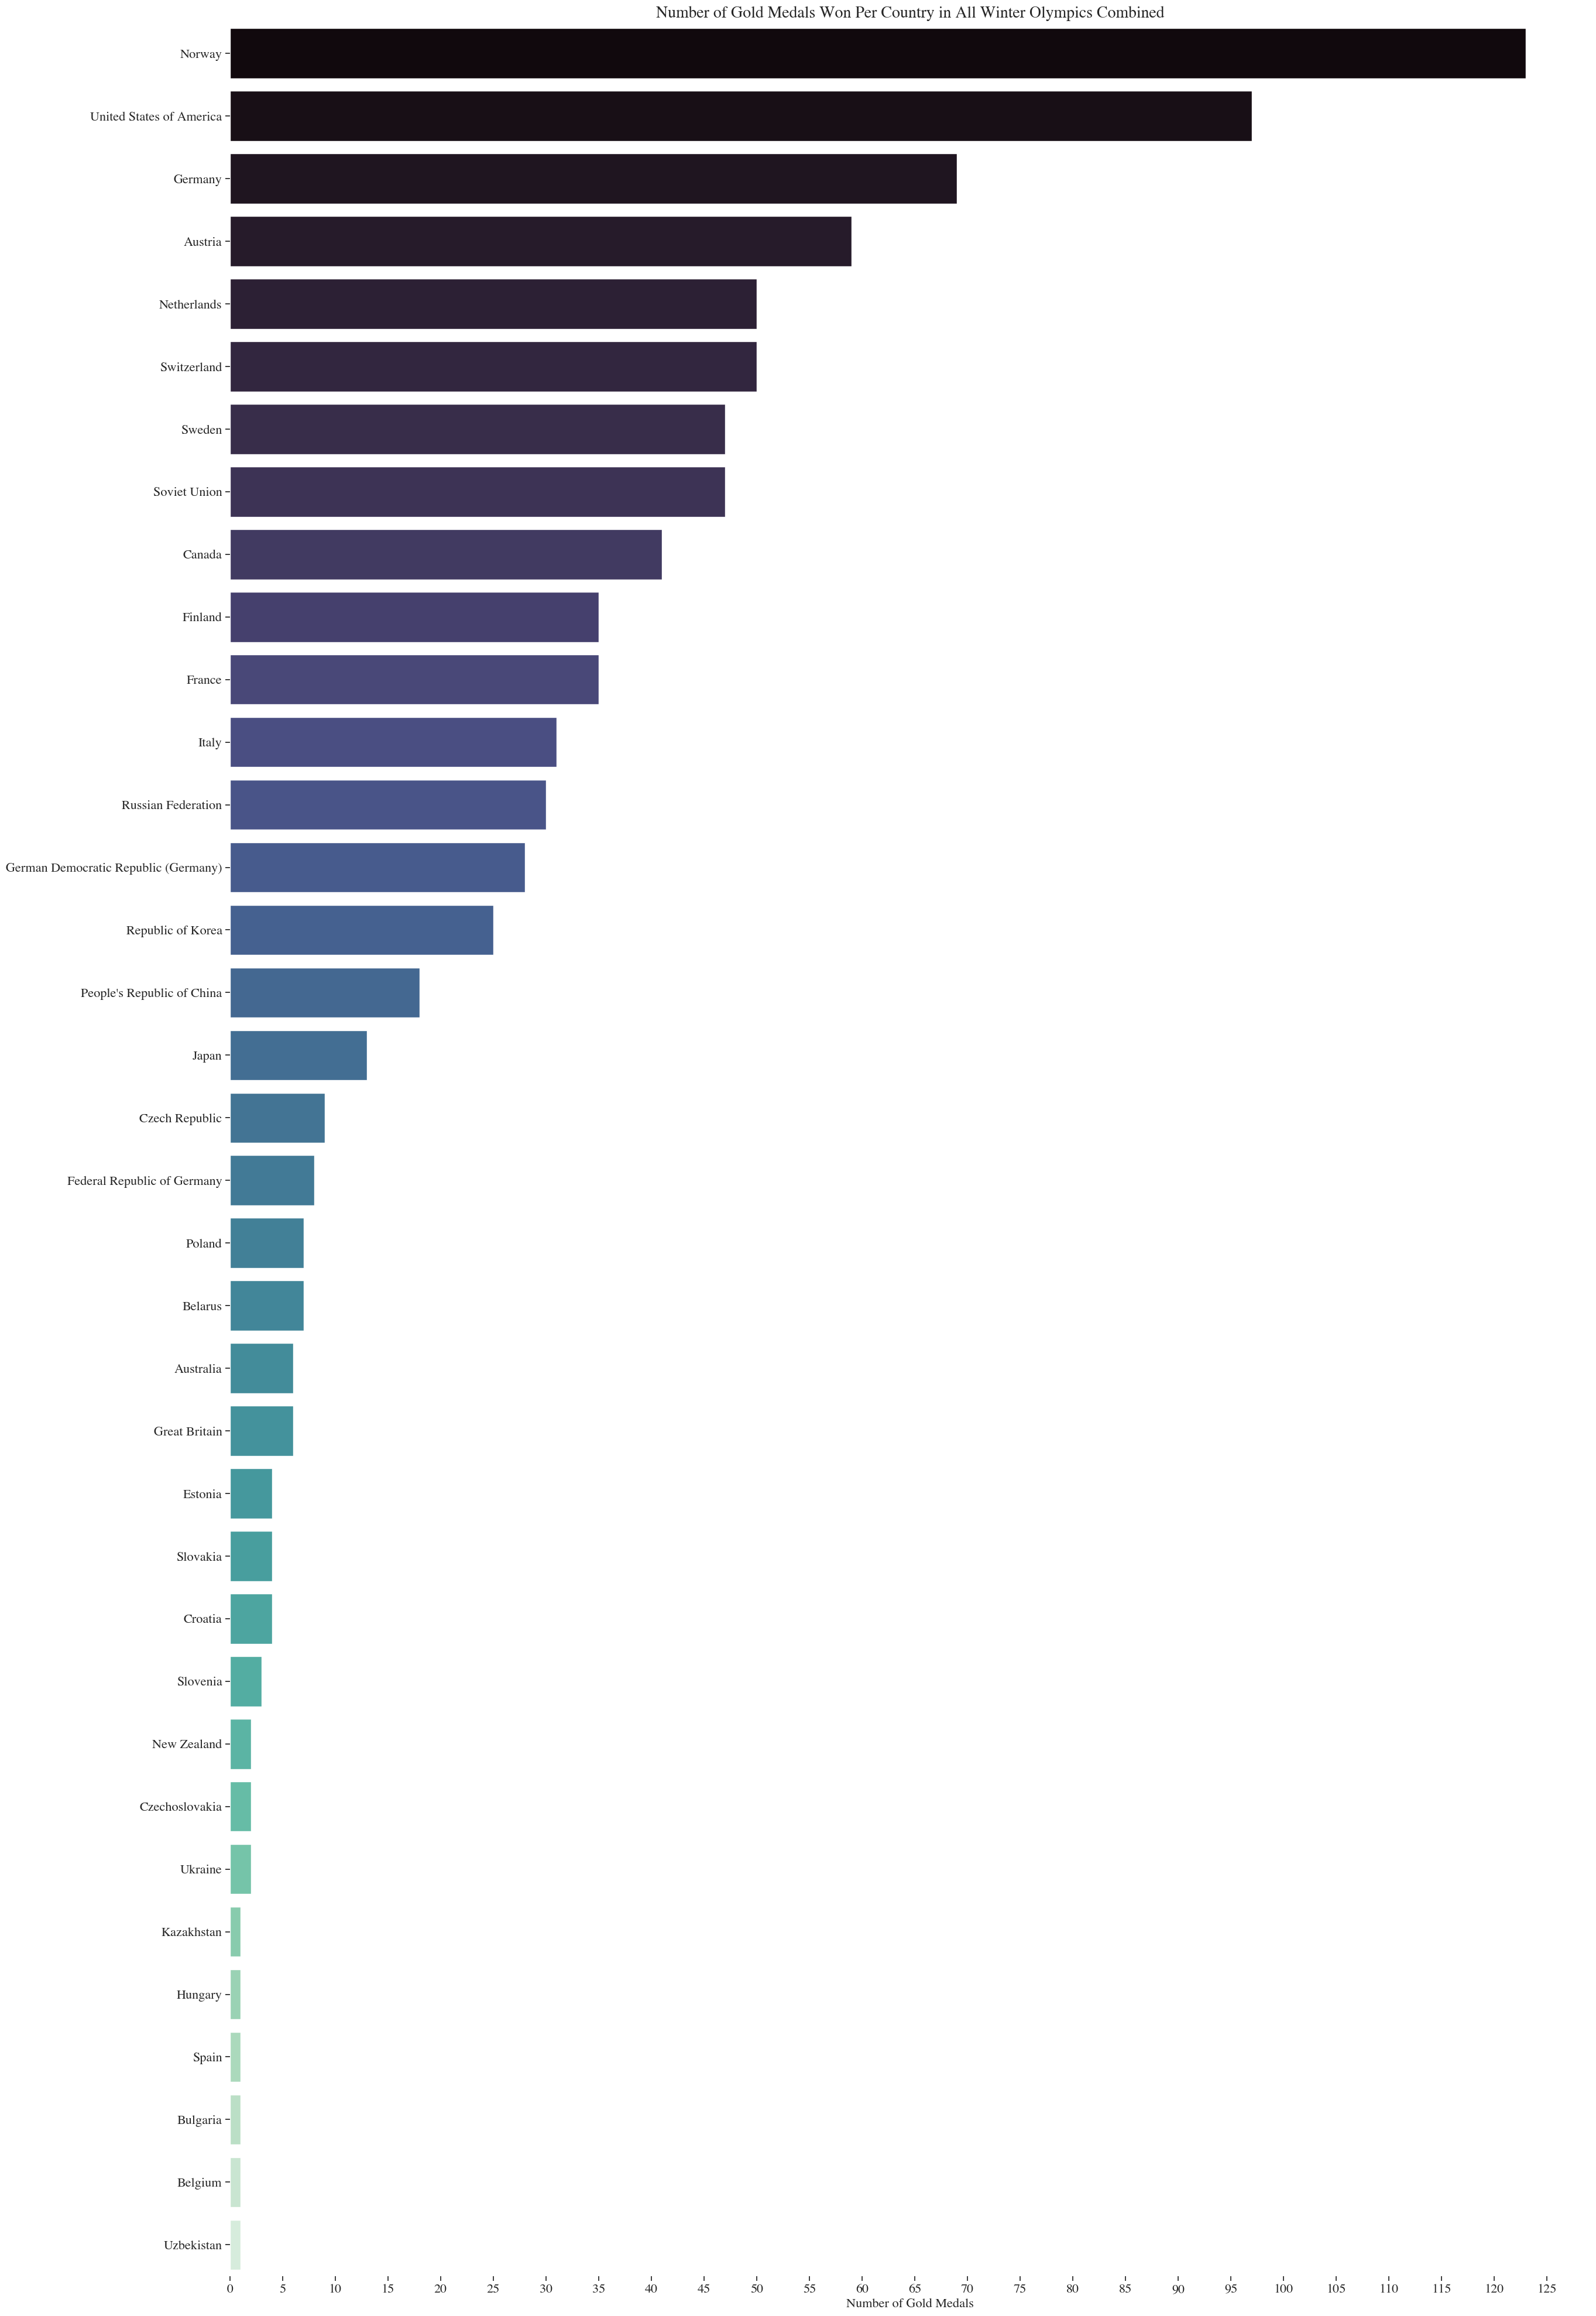

In [132]:
## Number of Gold Medals per Country: WINTER

## Actual Plot:
plt.figure(figsize=(30,50))
sns.barplot(GoldPerCountry, y="country", x="medal_type",palette="mako")

## Edit the Plot:
plt.xticks(np.arange(0, max(GoldPerCountry['medal_type'])+5,5))
ax = plt.gca()
ax.set_frame_on(False)

## Add Labels:
plt.title("Number of Gold Medals Won Per Country in All Winter Olympics Combined")
plt.xlabel("Number of Gold Medals")
plt.ylabel(None)

## Change Font Style:
plt.rcParams["font.family"] = "Times"

## Font Sizes:
SMALL_SIZE = 14
MEDIUM_SIZE = 16
BIGGER_SIZE = 20

## plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

## I am undecided if I like the colour of the bars?...
None

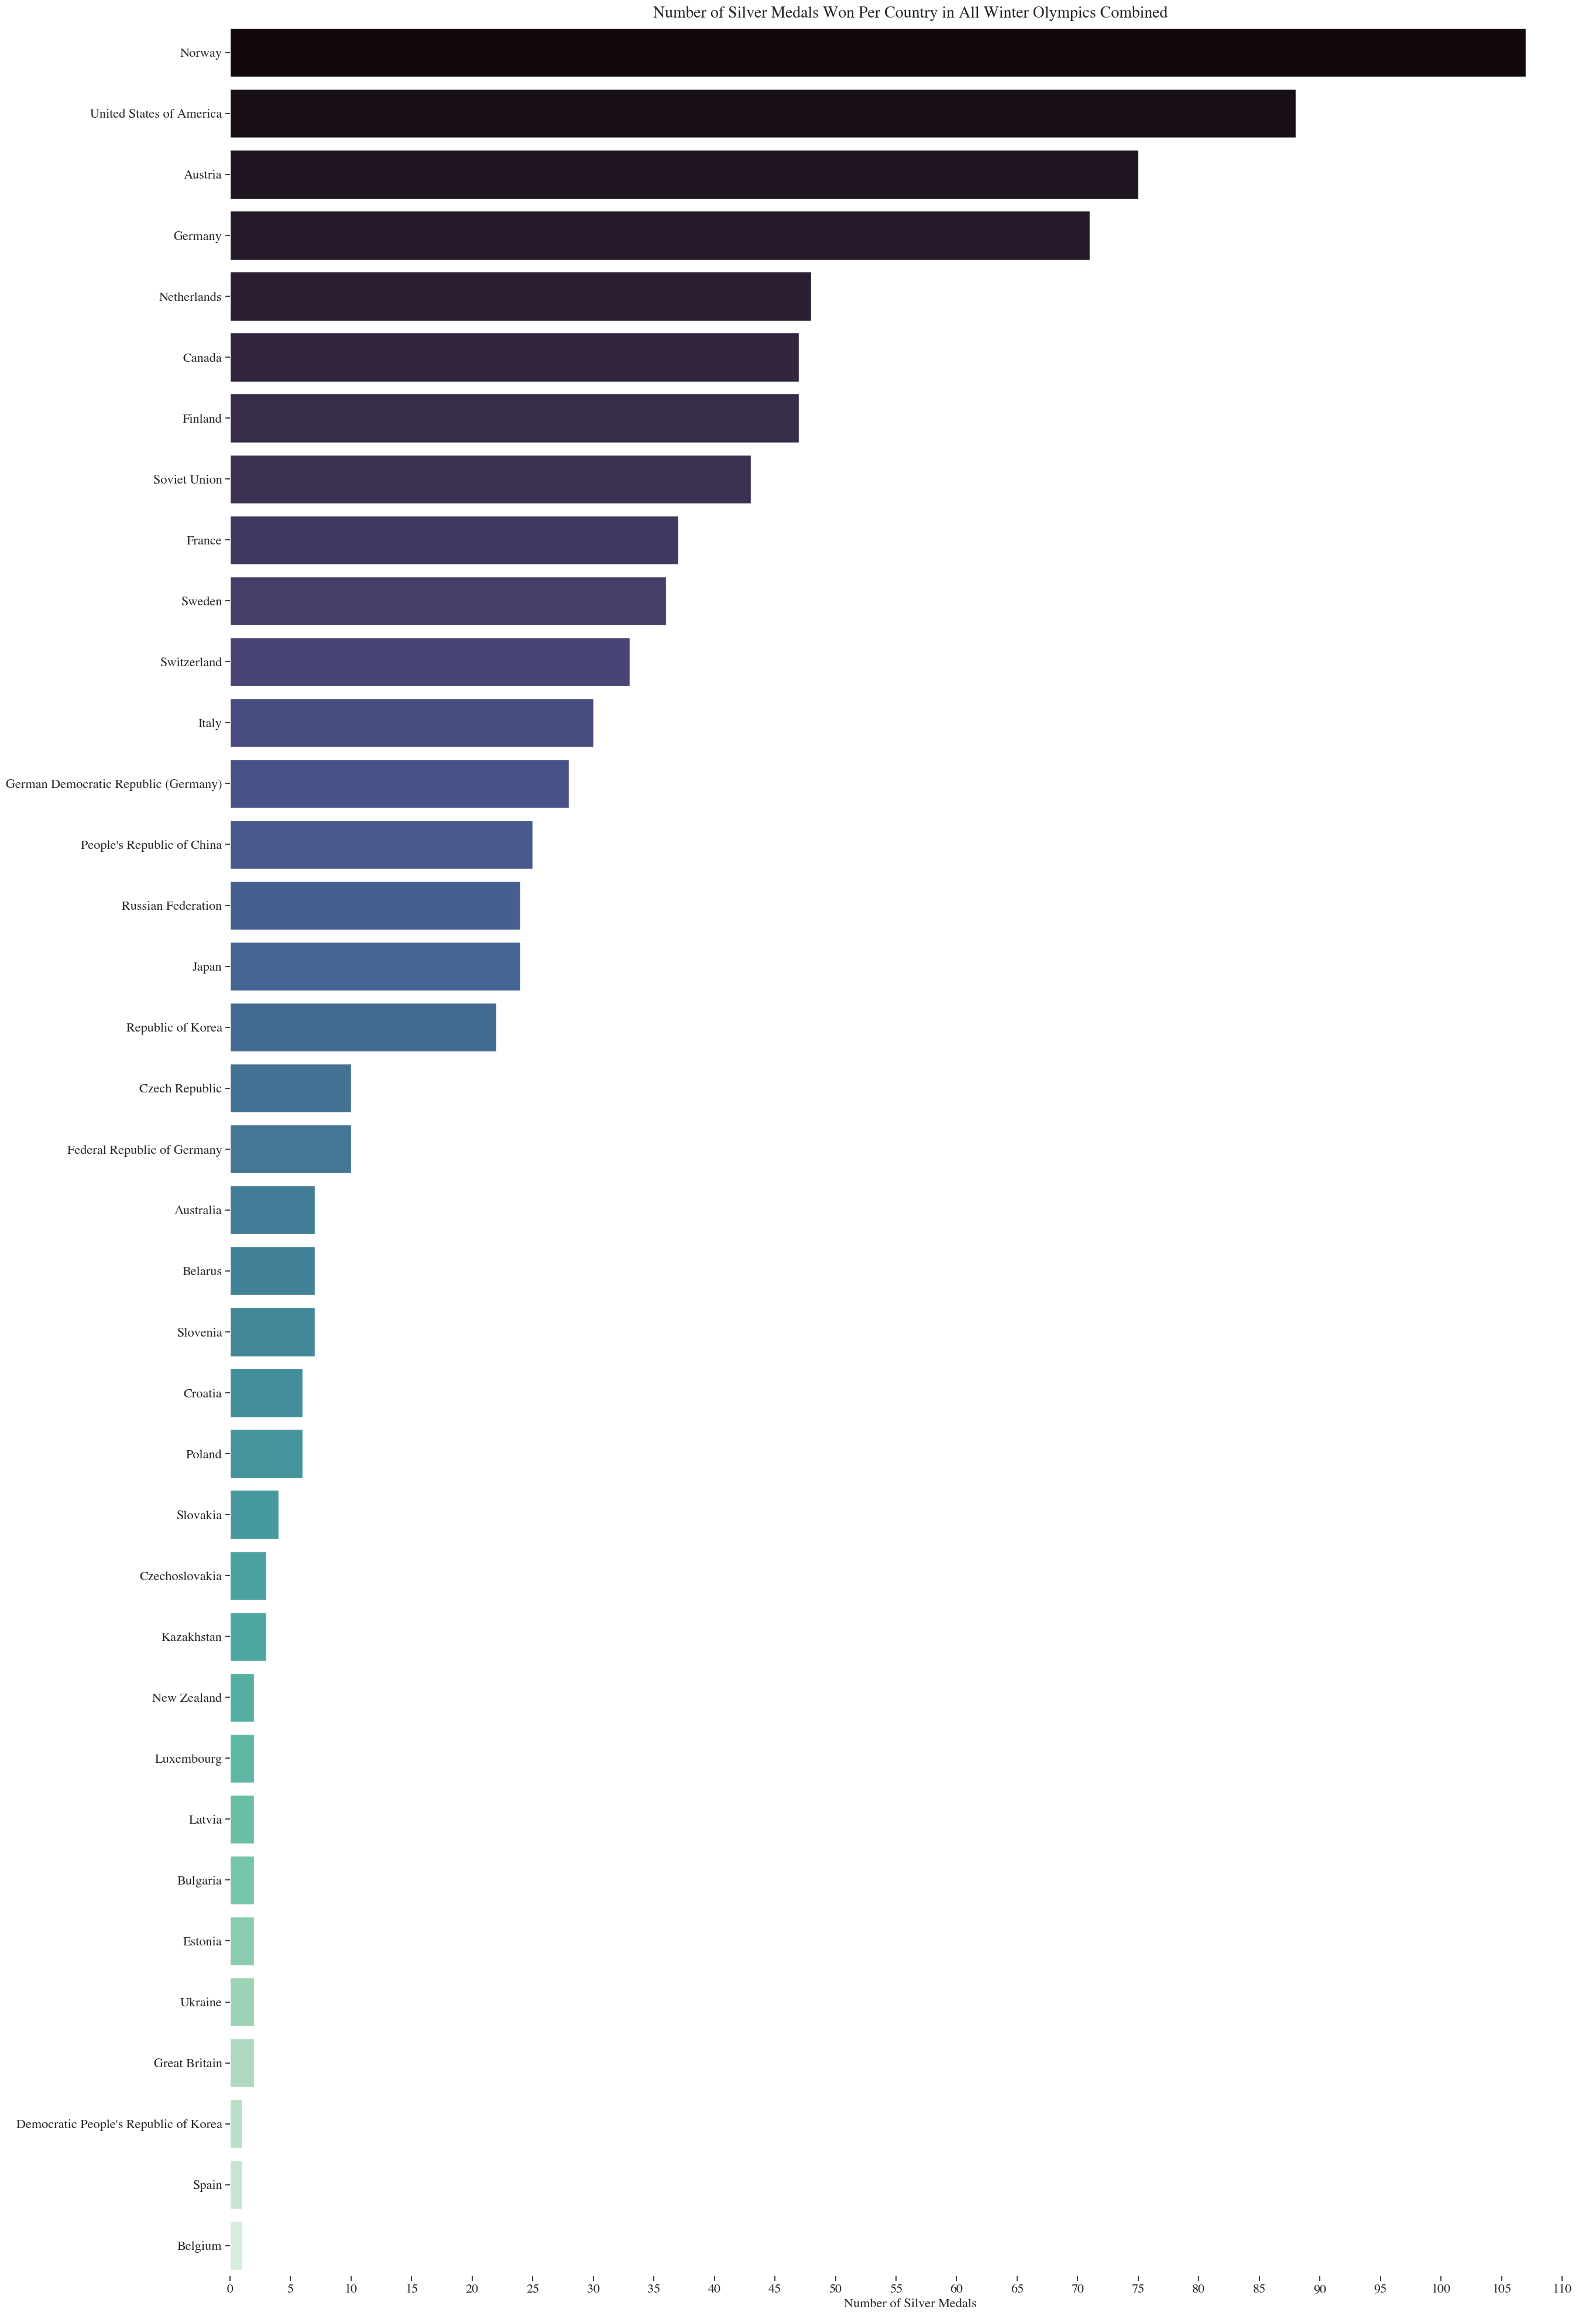

In [96]:
## Number of Silver Medals per Country: WINTER Note!! I started working on this plot first.

## Actual Plot:
plt.figure(figsize=(30,50))
sns.barplot(SilverPerCountry, y="country", x="medal_type",palette="mako")

## Edit the Plot:
plt.xticks(np.arange(0, max(SilverPerCountry['medal_type'])+5,5))
ax = plt.gca()
ax.set_frame_on(False)

## Add Labels:
plt.title("Number of Silver Medals Won Per Country in All Winter Olympics Combined")
plt.xlabel("Number of Silver Medals")
plt.ylabel(None)

## Value Labels: I spent at least an hour or two trying to figure out how to add bar labels to each bar so I can remove the x-axis and it's label...
SilverCountry = SilverPerCountry["country"]
SilverMedal = SilverPerCountry["medal_type"]

## def addlabels(SilverMedal, SilverCountry):
   ## for i in range(len(SilverCountry)):
       ## plt.text(i,SilverMedal[i],SilverMedal[i], verticalalignment= 'center', bbox = dict(facecolor = 'white', alpha =.8))

##addlabels(SilverMedal, SilverCountry)


## Change Font Style:
plt.rcParams["font.family"] = "Times"

## Font Sizes:
SMALL_SIZE = 14
MEDIUM_SIZE = 16
BIGGER_SIZE = 20

## plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

## I am undecided if I like the colour of the bars?...
None

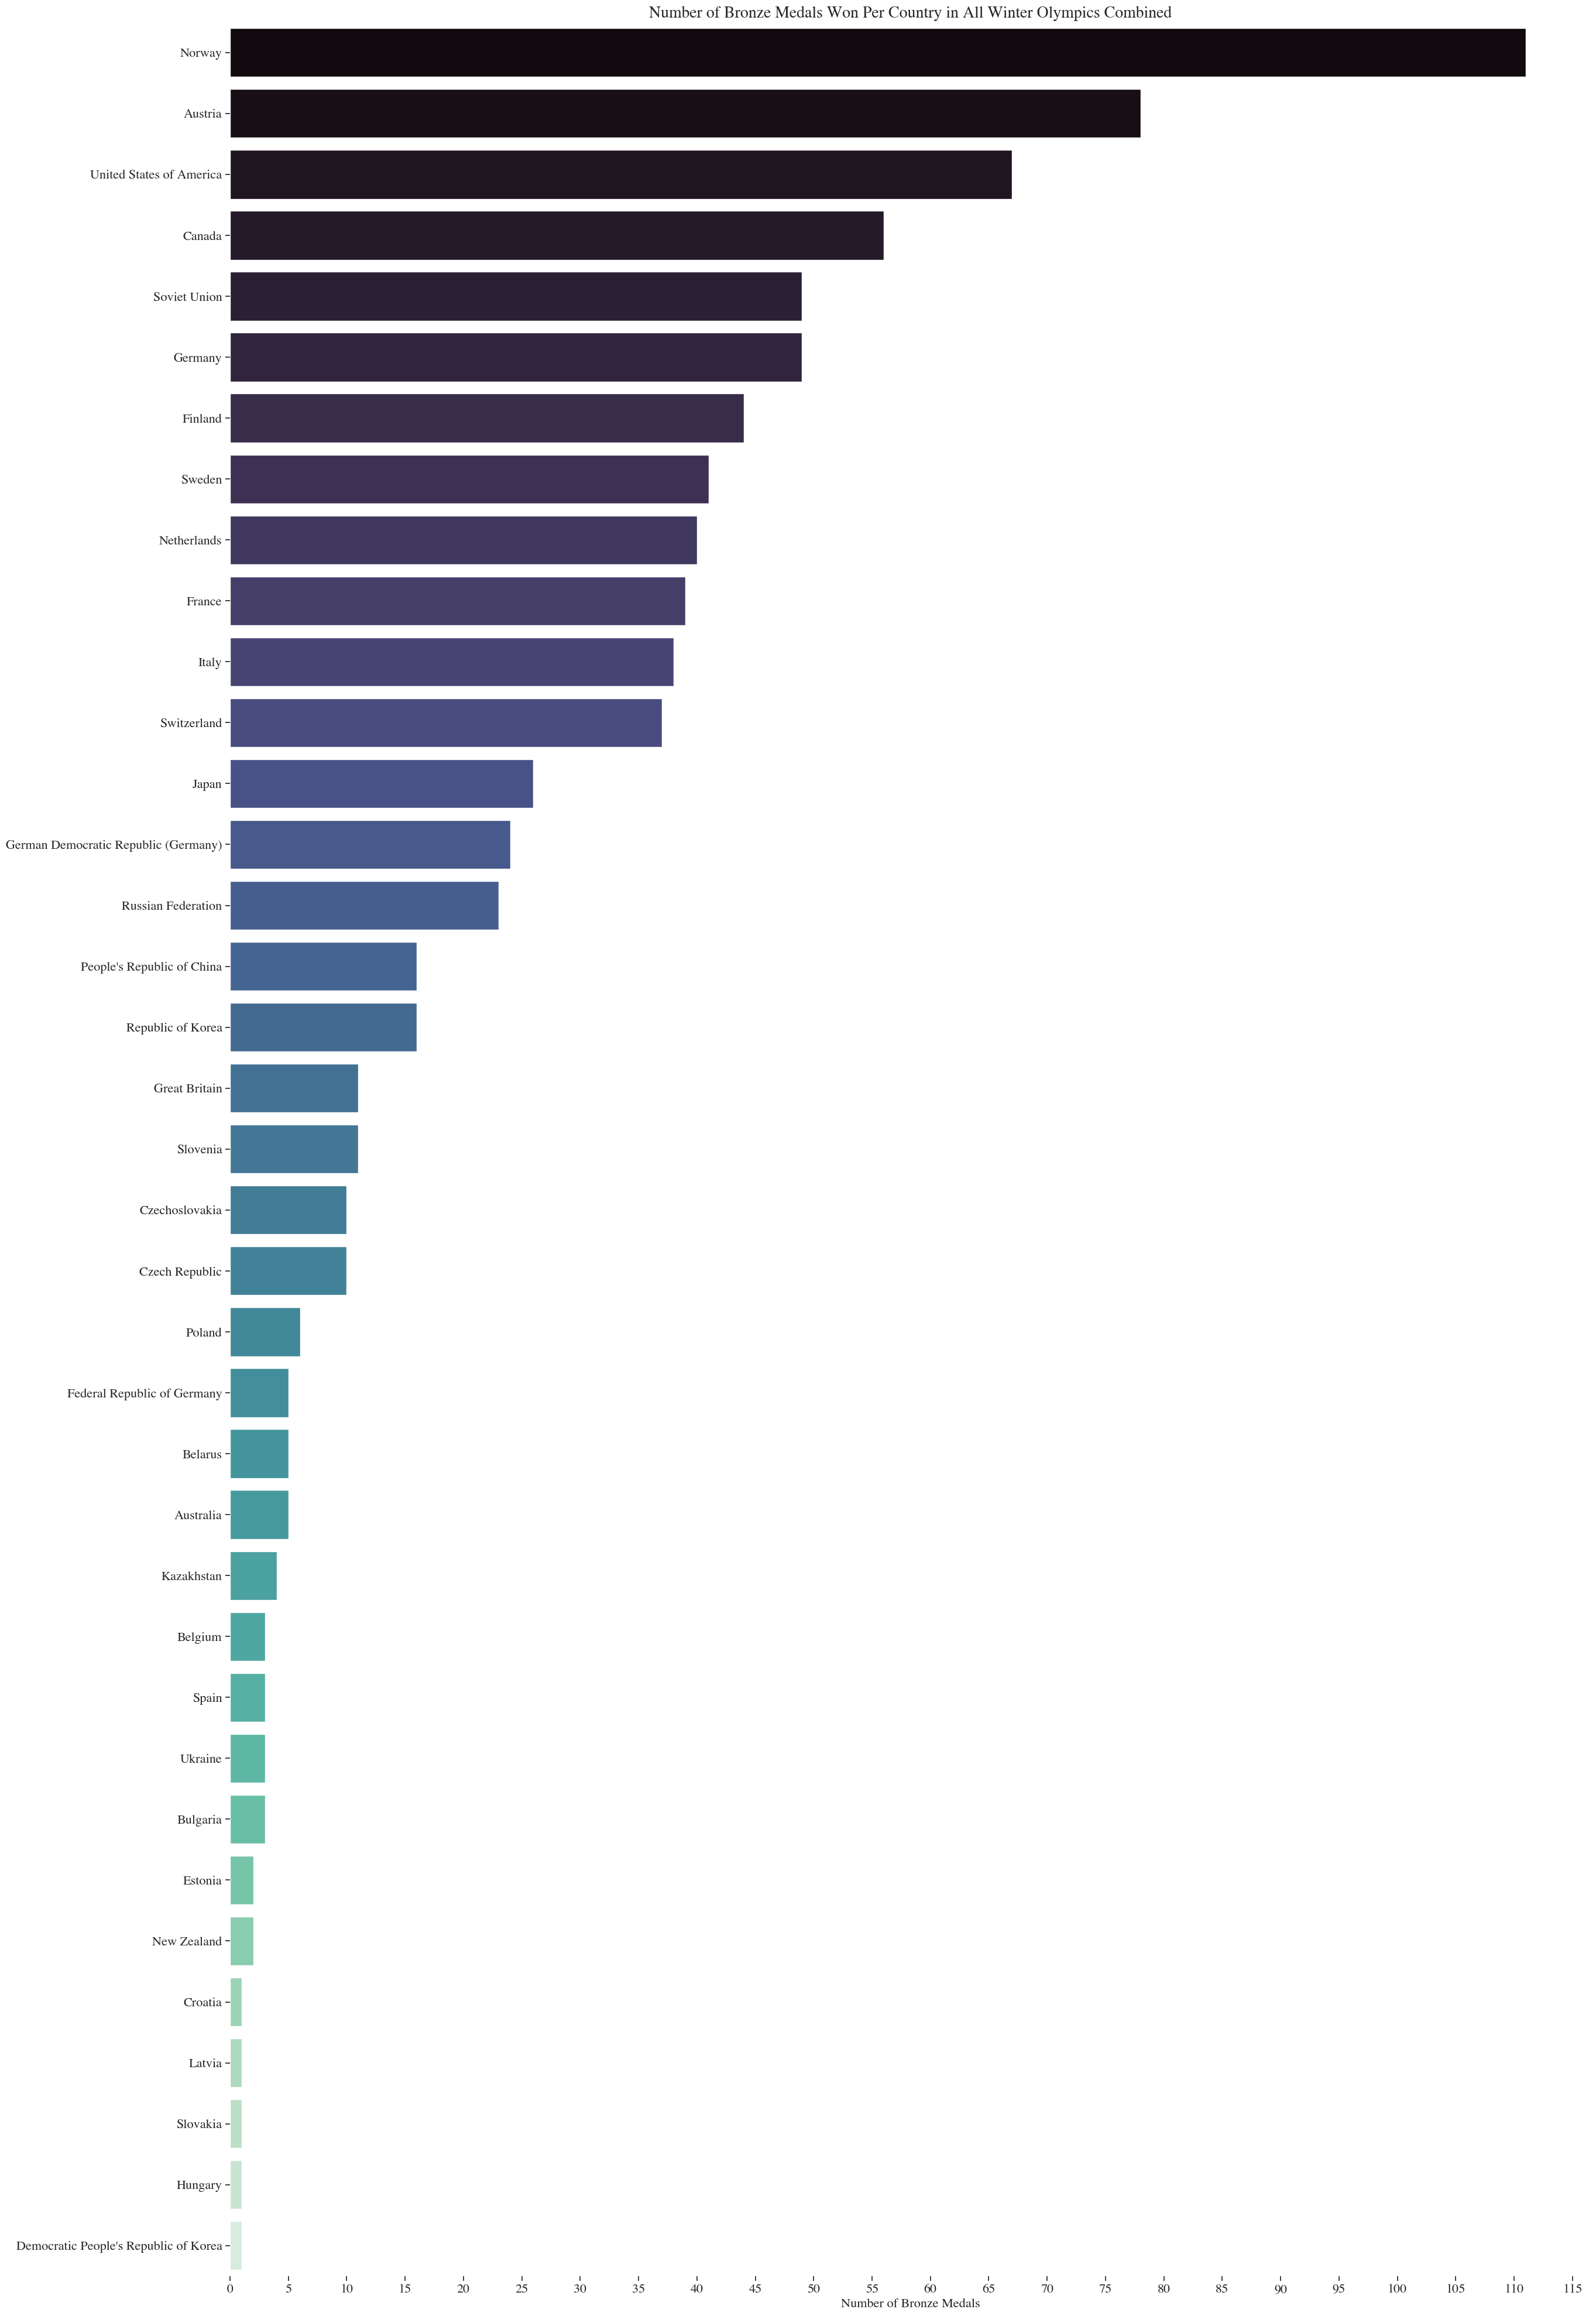

In [133]:
## Number of Bronze Medals per Country: WINTER

## Actual Plot:
plt.figure(figsize=(30,50))
sns.barplot(BronzePerCountry, y="country", x="medal_type",palette="mako")

## Edit the Plot:
plt.xticks(np.arange(0, max(BronzePerCountry['medal_type'])+5,5))
ax = plt.gca()
ax.set_frame_on(False)

## Add Labels:
plt.title("Number of Bronze Medals Won Per Country in All Winter Olympics Combined")
plt.xlabel("Number of Bronze Medals")
plt.ylabel(None)

## Change Font Style:
plt.rcParams["font.family"] = "Times"

## Font Sizes:
SMALL_SIZE = 14
MEDIUM_SIZE = 16
BIGGER_SIZE = 20

## plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

## I am undecided if I like the colour of the bars?...
None

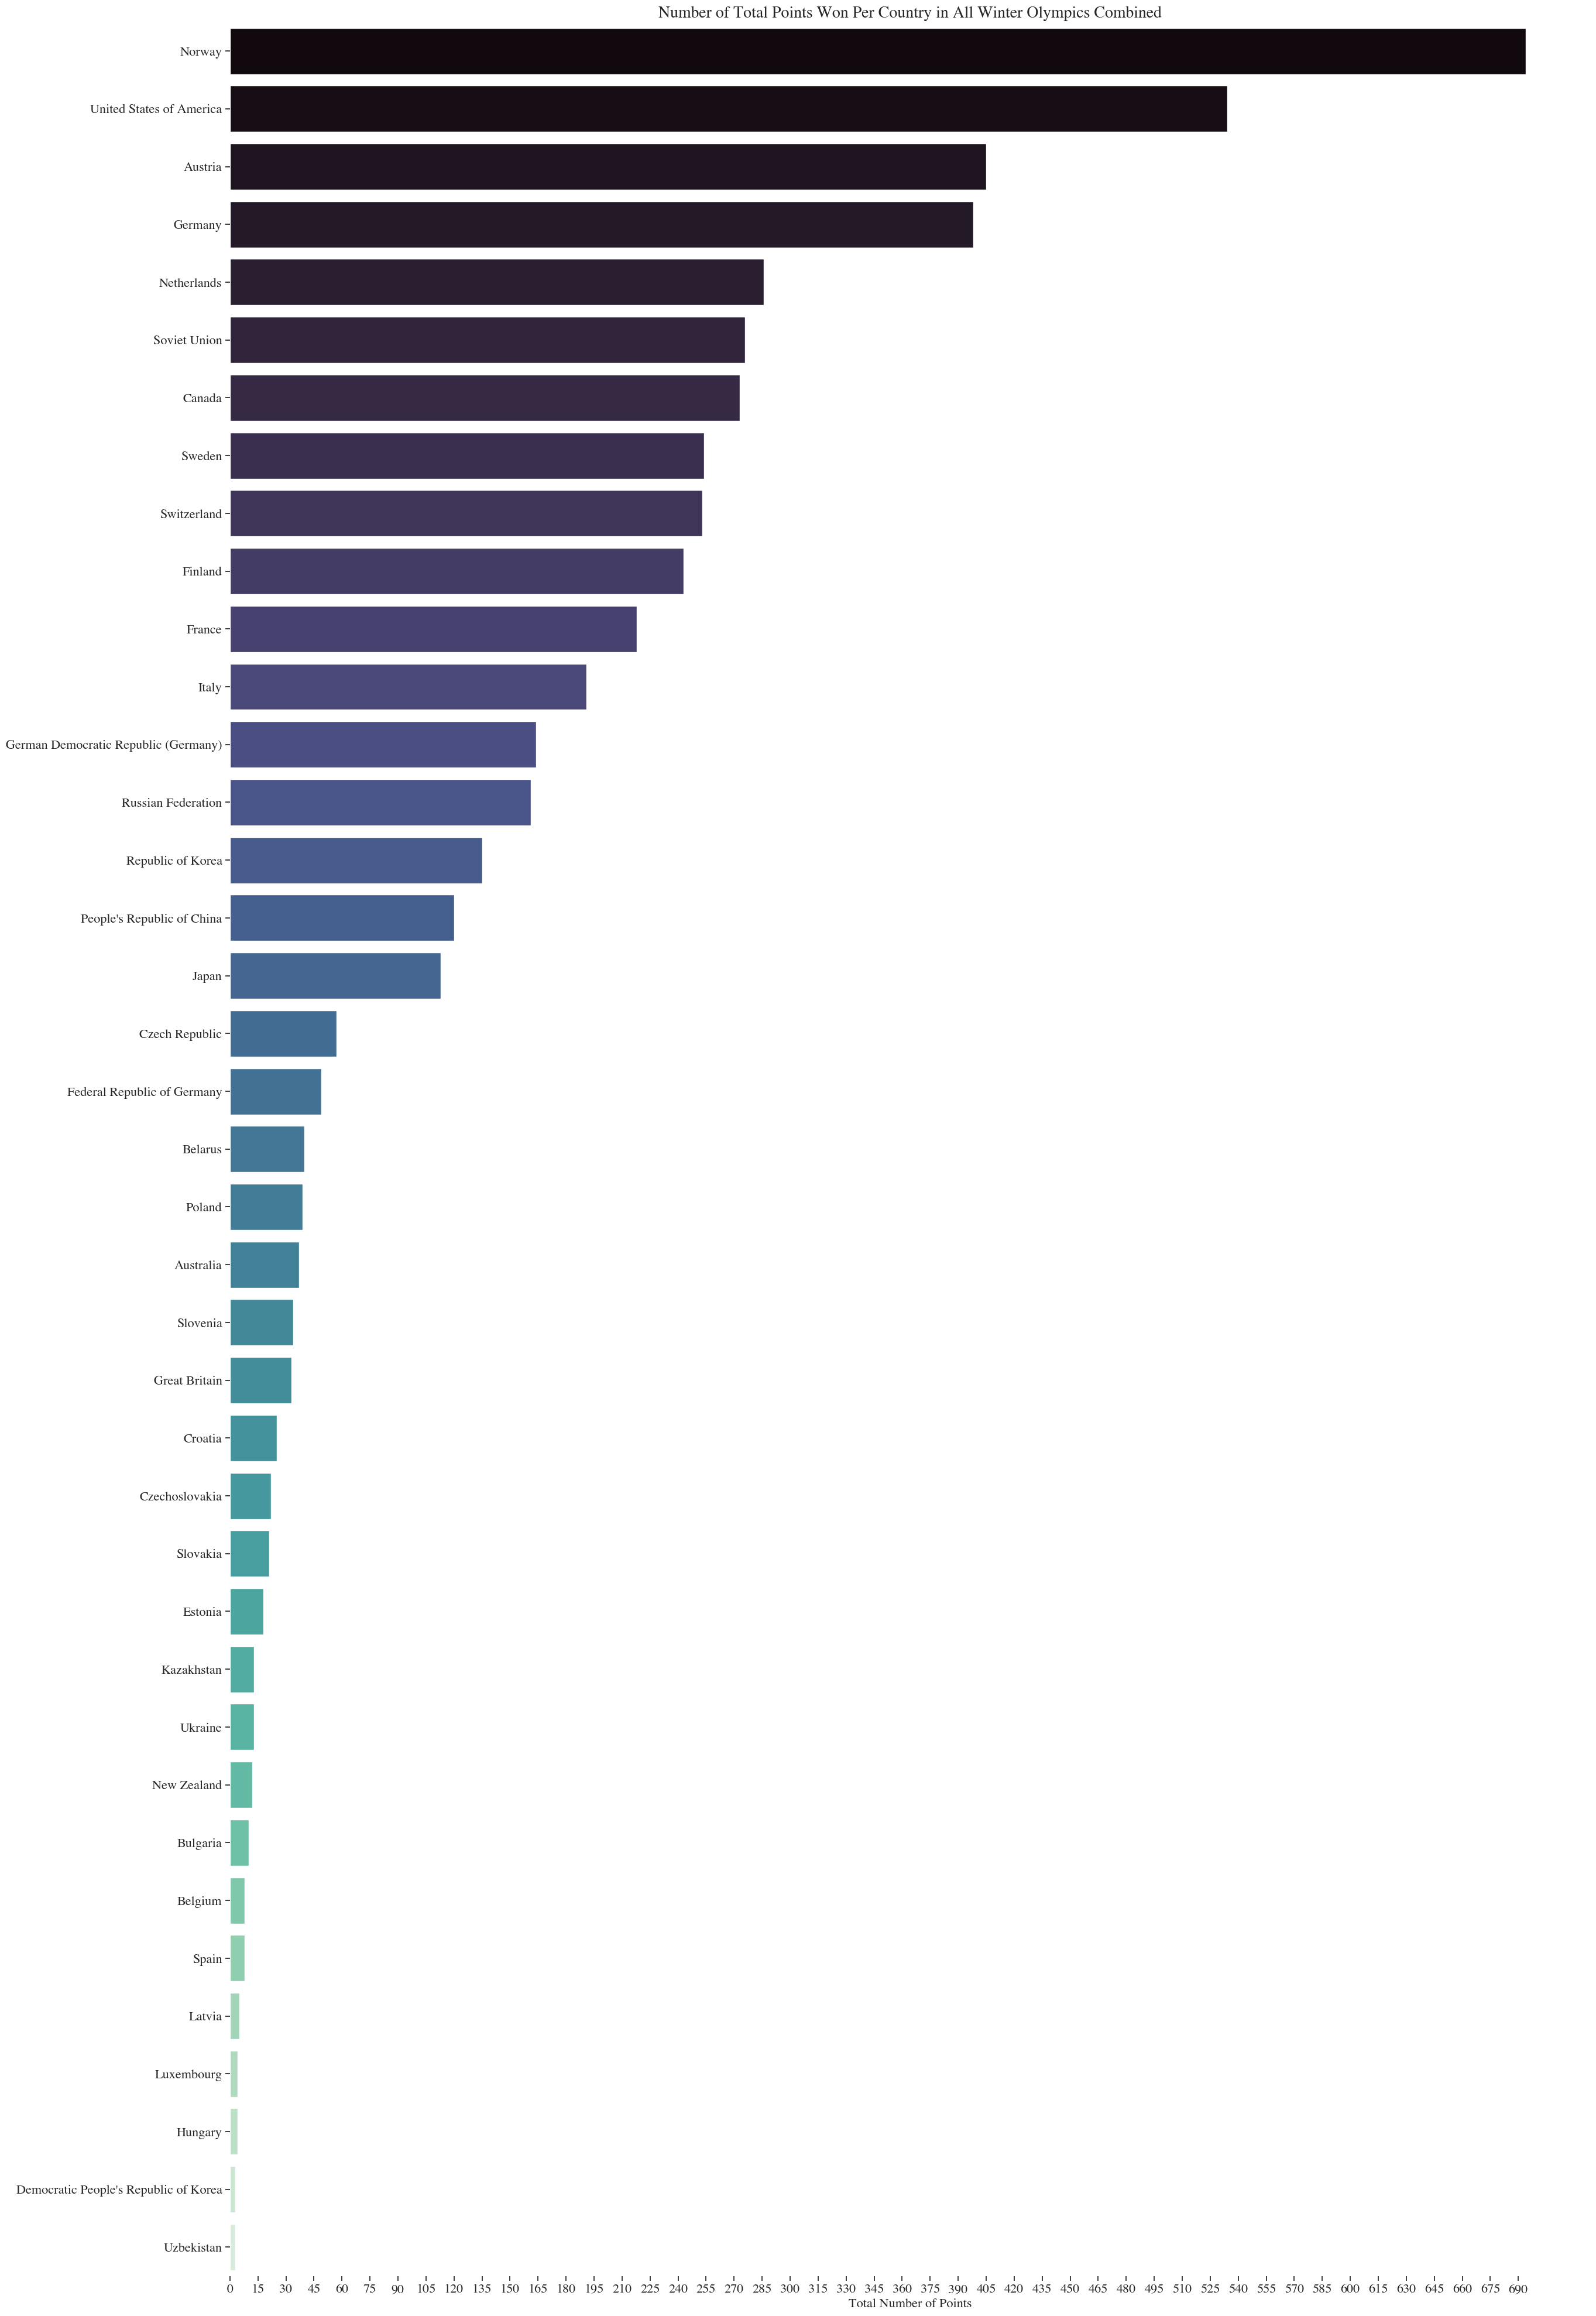

In [137]:
## Number of Total Points per Country: WINTER

## Actual Plot:
plt.figure(figsize=(30,50))
sns.barplot(TotalPointsCountry, y="country", x="point_value",palette="mako")

## Edit the Plot:
plt.xticks(np.arange(0, max(TotalPointsCountry['point_value'])+10,15))
ax = plt.gca()
ax.set_frame_on(False)

## Add Labels:
plt.title("Number of Total Points Won Per Country in All Winter Olympics Combined")
plt.xlabel("Total Number of Points")
plt.ylabel(None)

## Change Font Style:
plt.rcParams["font.family"] = "Times"

## Font Sizes:
SMALL_SIZE = 14
MEDIUM_SIZE = 16
BIGGER_SIZE = 20

## plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

## I am undecided if I like the colour of the bars?...
None

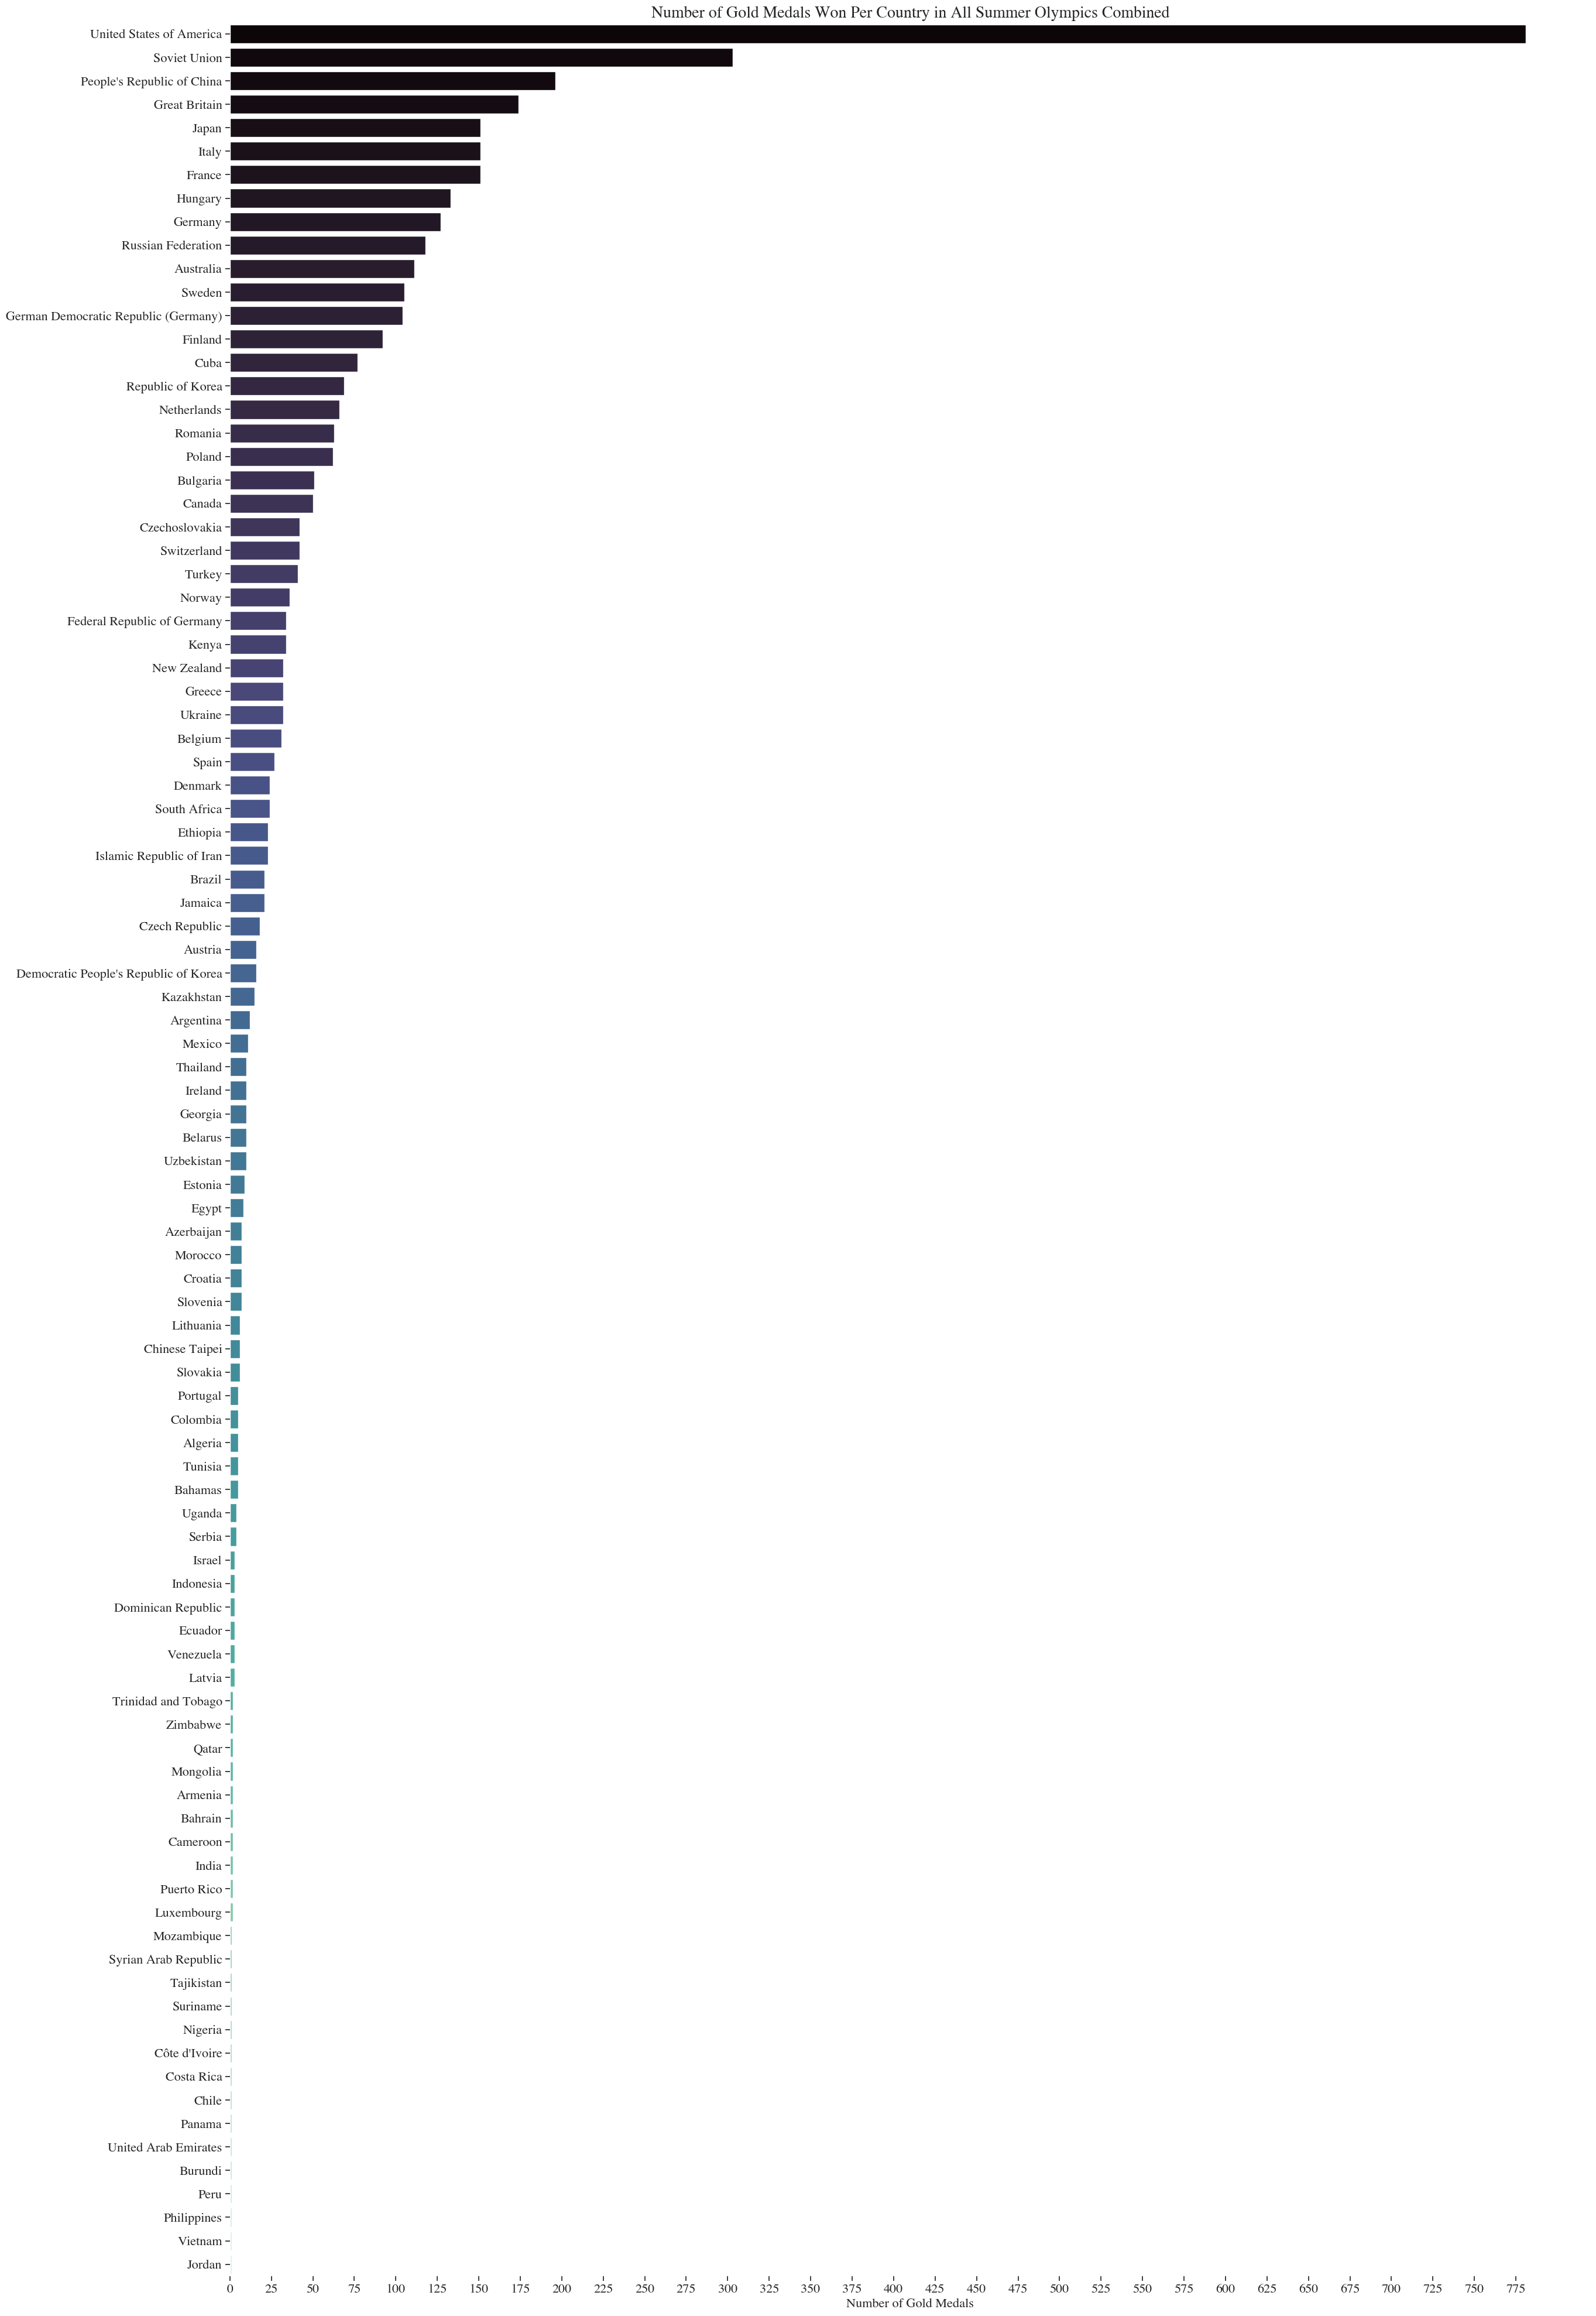

In [147]:
## Number of Gold Medals per Country: SUMMER

## Actual Plot:
plt.figure(figsize=(30,50))
sns.barplot(GoldPerCountryS, y="country", x="medal_type",palette="mako")

## Edit the Plot:
plt.xticks(np.arange(0, max(GoldPerCountryS['medal_type'])+5,25))
ax = plt.gca()
ax.set_frame_on(False)

## Add Labels:
plt.title("Number of Gold Medals Won Per Country in All Summer Olympics Combined")
plt.xlabel("Number of Gold Medals")
plt.ylabel(None)

## Change Font Style:
plt.rcParams["font.family"] = "Times"

## Font Sizes:
SMALL_SIZE = 14
MEDIUM_SIZE = 16
BIGGER_SIZE = 20

## plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

## I am undecided if I like the colour of the bars?...
None

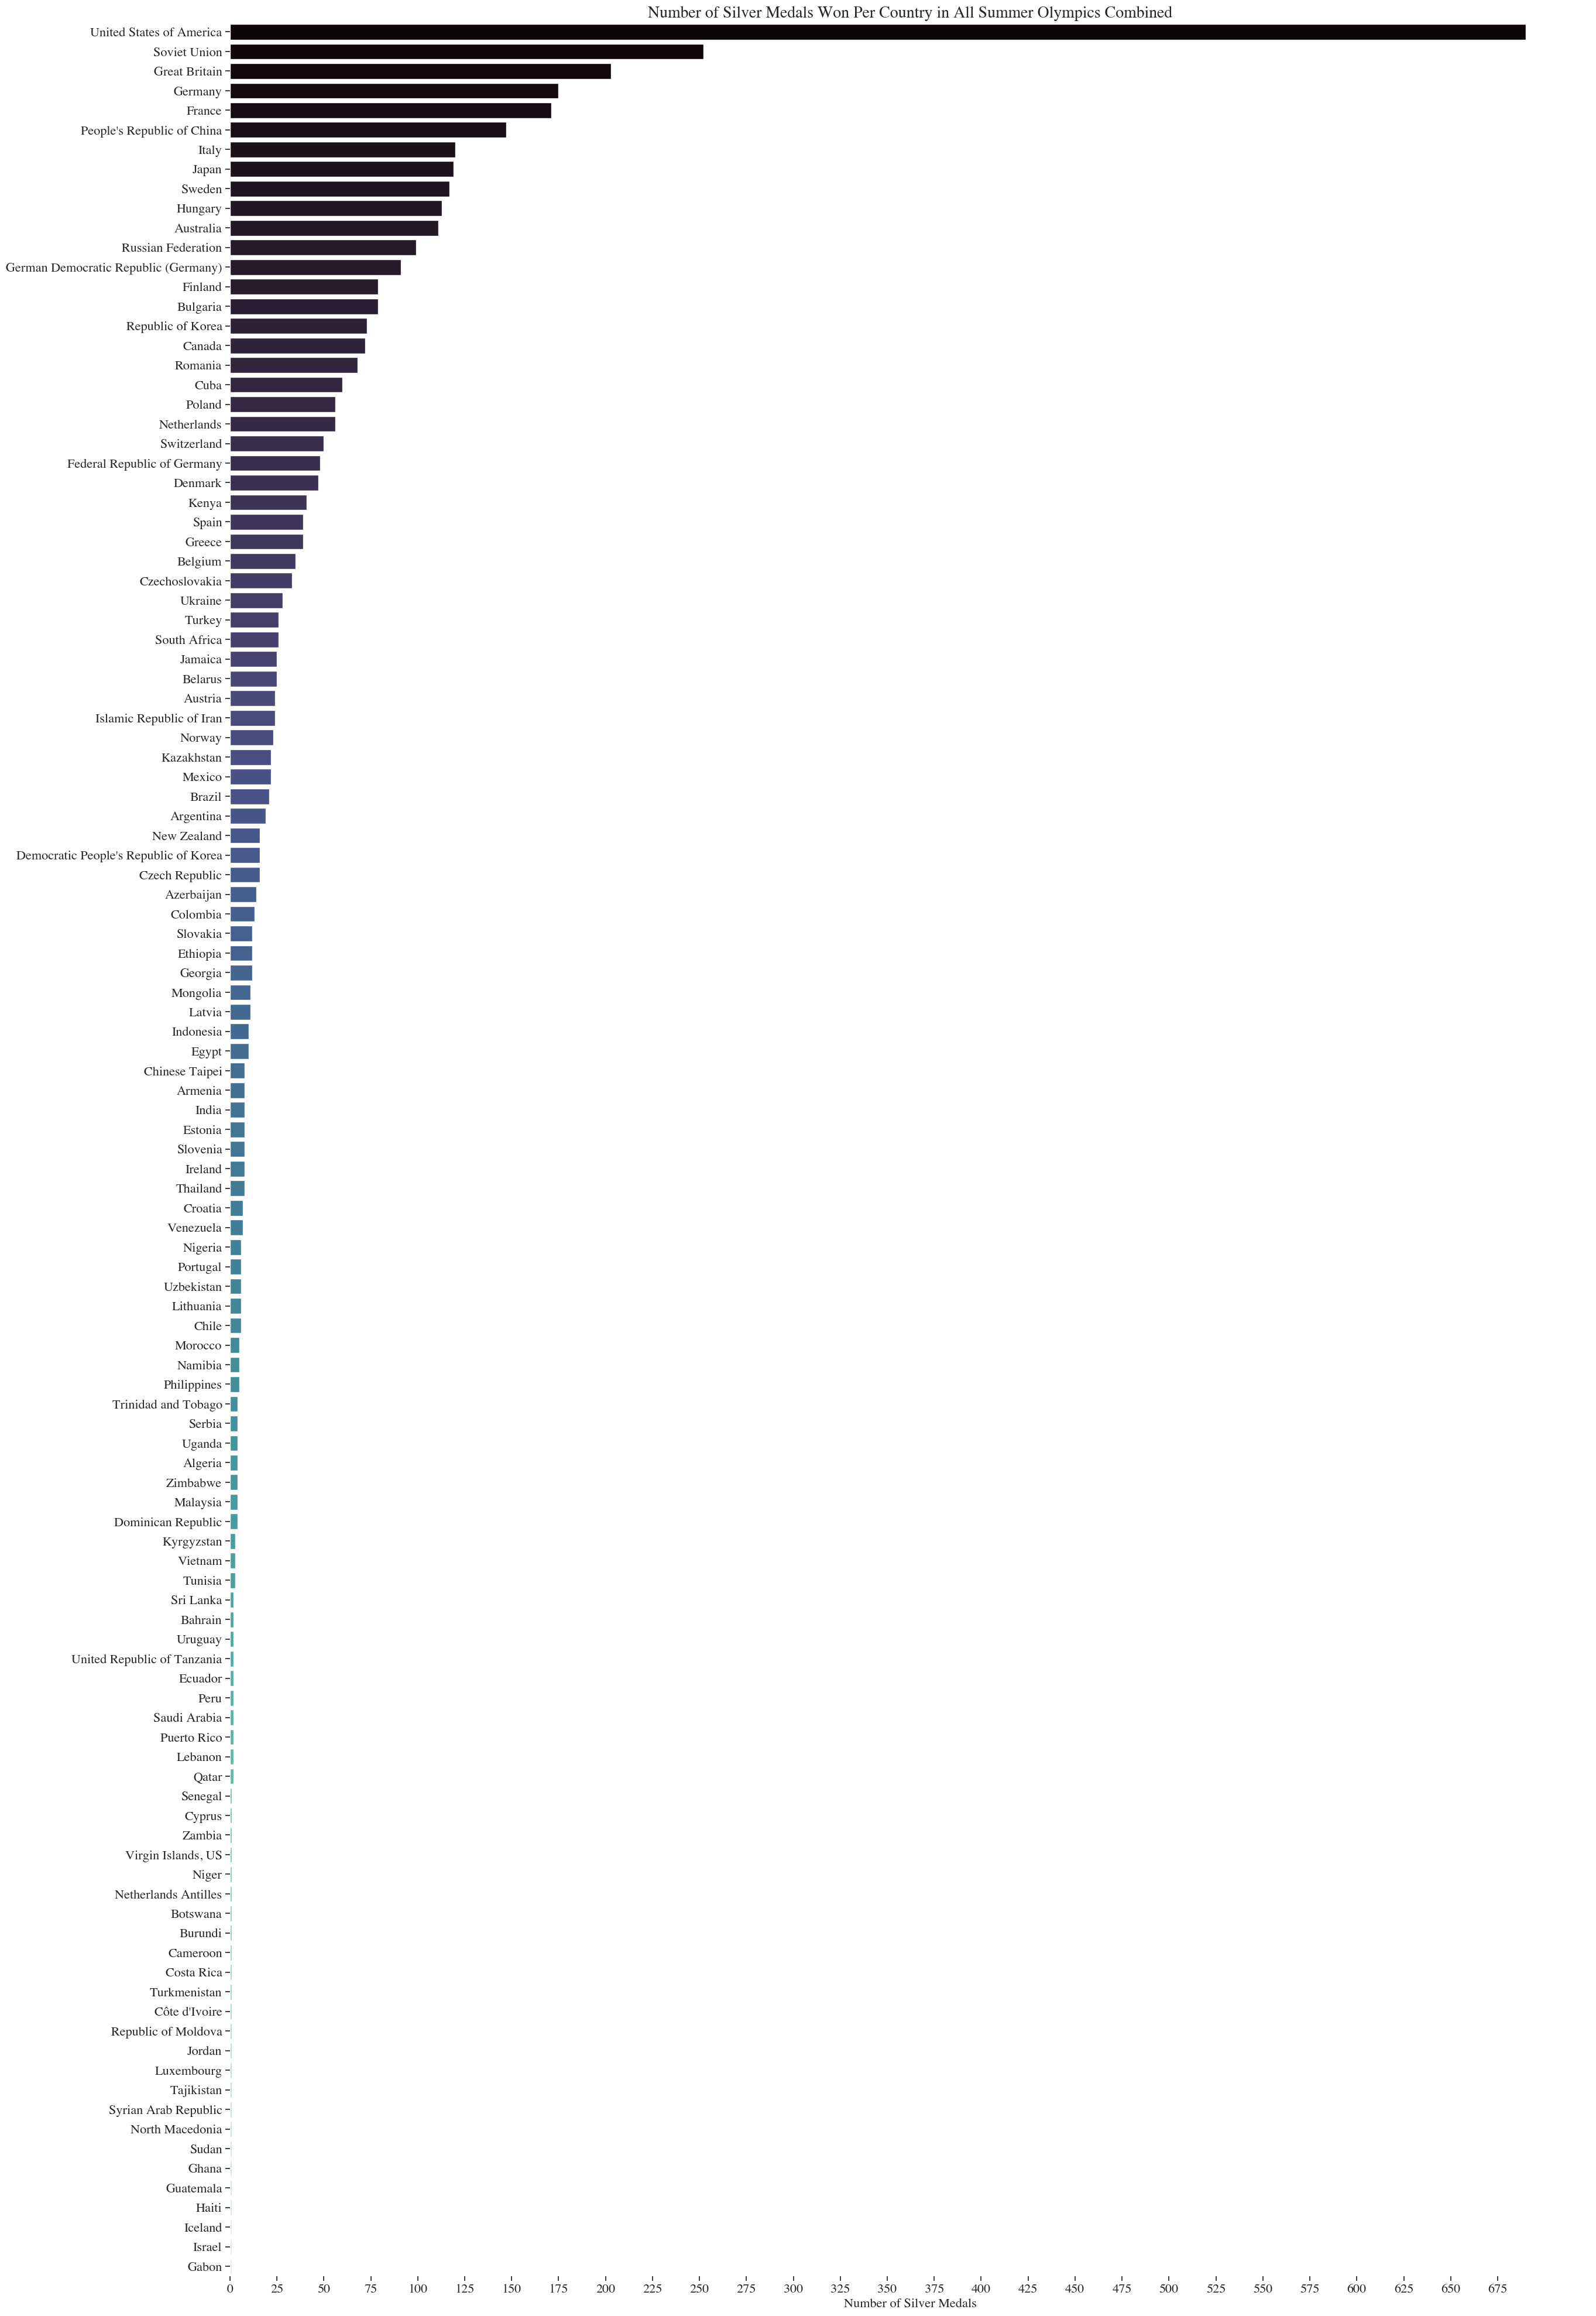

In [149]:
## Number of Silver Medals per Country: SUMMER

## Actual Plot:
plt.figure(figsize=(30,50))
sns.barplot(SilverPerCountryS, y="country", x="medal_type",palette="mako")

## Edit the Plot:
plt.xticks(np.arange(0, max(SilverPerCountryS['medal_type'])+5,25))
ax = plt.gca()
ax.set_frame_on(False)

## Add Labels:
plt.title("Number of Silver Medals Won Per Country in All Summer Olympics Combined")
plt.xlabel("Number of Silver Medals")
plt.ylabel(None)

## Change Font Style:
plt.rcParams["font.family"] = "Times"

## Font Sizes:
SMALL_SIZE = 14
MEDIUM_SIZE = 16
BIGGER_SIZE = 20

## plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

## I am undecided if I like the colour of the bars?...
None

In [154]:
## Number of Bronze Medals per Country: Summer ... I give up, I have no idea why this plot won't work.

## Actual Plot:
##plt.figure(figsize=(30,50))
sns.barplot(BronzePerCountryS, y="country", x="medal_type",palette="mako")

## Edit the Plot:
plt.xticks(np.arange(0, max(BronzePerCountryS['medal_type'])+5,5))
ax = plt.gca()
ax.set_frame_on(False)

## Add Labels:
plt.title("Number of Bronze Medals Won Per Country in All Summer Olympics Combined")
plt.xlabel("Number of Bronze Medals")
plt.ylabel(None)

## Change Font Style:
plt.rcParams["font.family"] = "Times"

## Font Sizes:
SMALL_SIZE = 14
MEDIUM_SIZE = 16
BIGGER_SIZE = 20

## plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

## I am undecided if I like the colour of the bars?...
None

NameError: name 'BronzePerCountryS' is not defined

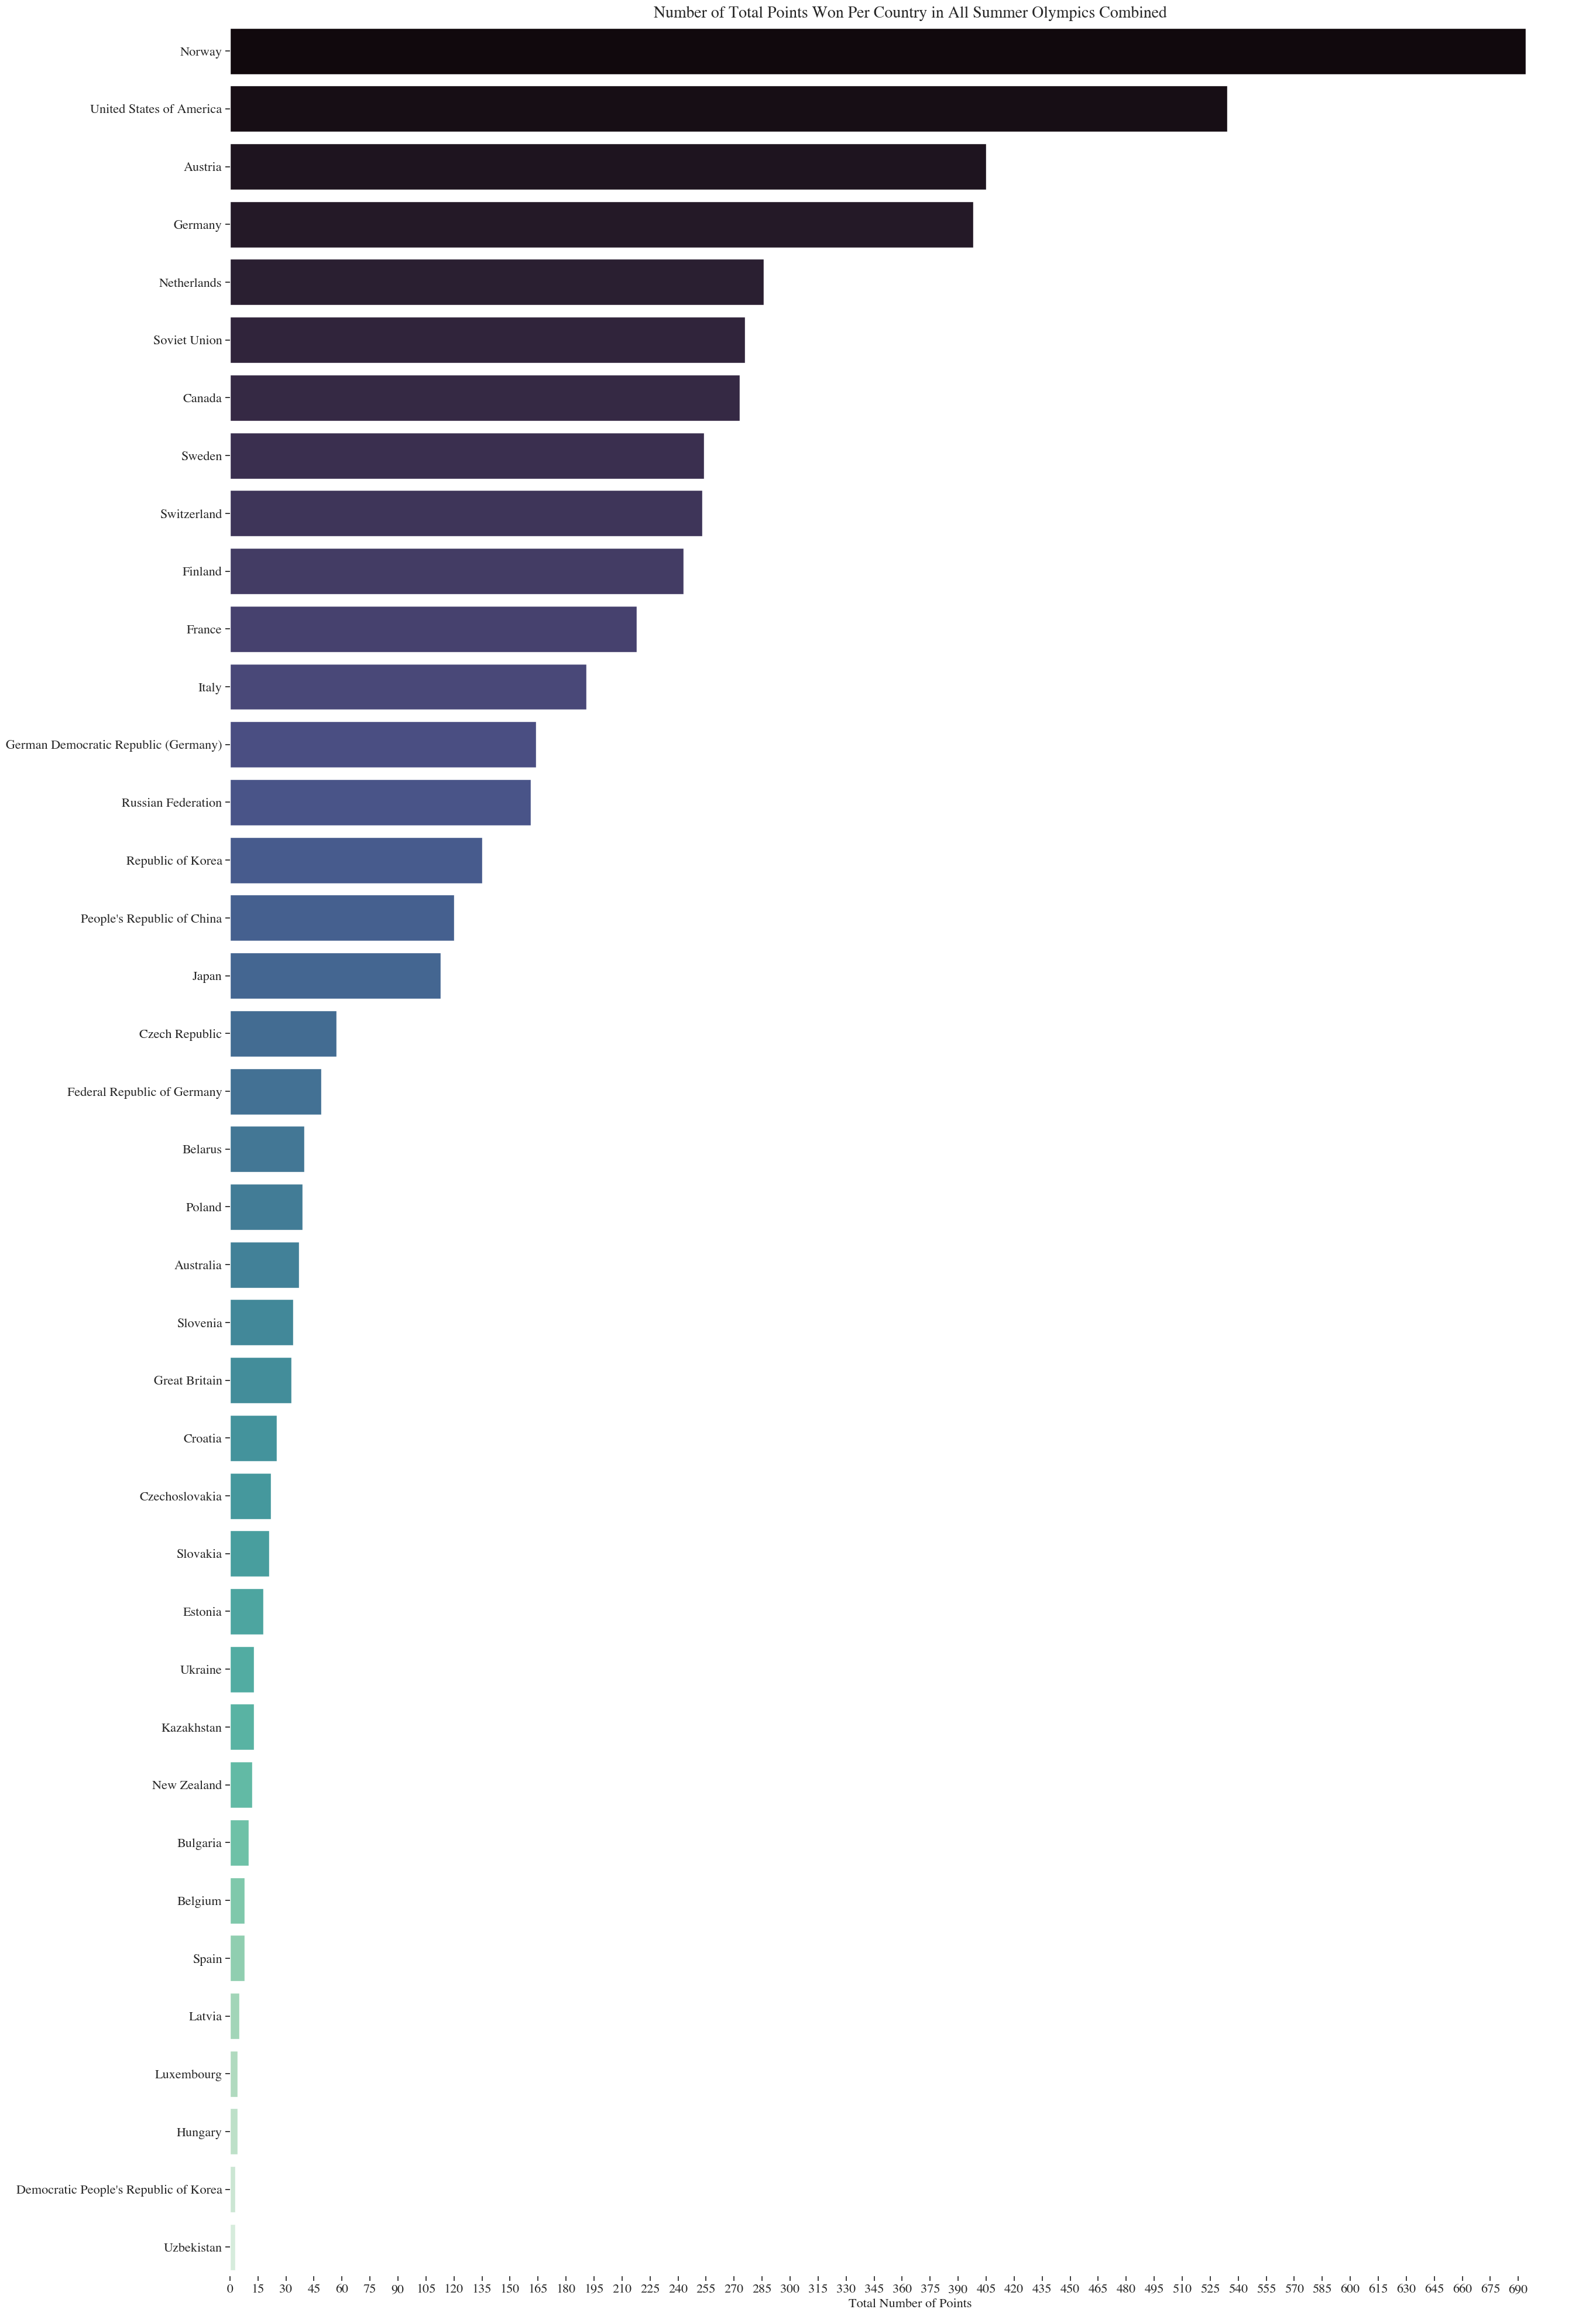

In [156]:
## Number of Total Points per Country: SUMMER

## Actual Plot:
plt.figure(figsize=(30,50))
sns.barplot(TotalPointsCountryS, y="country", x="point_value",palette="mako")

## Edit the Plot:
plt.xticks(np.arange(0, max(TotalPointsCountryS['point_value'])+10,15))
ax = plt.gca()
ax.set_frame_on(False)

## Add Labels:
plt.title("Number of Total Points Won Per Country in All Summer Olympics Combined")
plt.xlabel("Total Number of Points")
plt.ylabel(None)

## Change Font Style:
plt.rcParams["font.family"] = "Times"

## Font Sizes:
SMALL_SIZE = 14
MEDIUM_SIZE = 16
BIGGER_SIZE = 20

## plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

## I am undecided if I like the colour of the bars?...
None

## Milestone Three: Exploratory Data Analysis Conclusion

First, before I explain into my exploratory data analysis (EDA), I would like to specify that I am going to attend the project office hours to figure out a minor predicament I have encountered. It is minor and I can still produce the required expectations for Milestone 3, however, once my problem is resolved I will be able to develop more sophisticated EDA plots. EDA is supposed to be an insight to one's analysis which allows for basic predictions to be made and if errors such as violation assumptions are present within the data, EDA gives one a starting place to perform model adequacy and diagnostics. 

Second, I have a profound background in working research position for the majority of my university career thus far. This positions have included copious amount of work in various areas however I have spent a good portion of my time coding in R for my employers. Additionally, being in my 5th year of a combined degree of Statistics and Ecology, I have spent a lot of time on my course work coding. Overall, my experience in coding especially in R is significant and shouldn't be a set back on my behalf towards this project.

Third, I spent approximately 16 to 18 hours just on the data cleaning and wrangling for this milestone. For someone knowledgeable with how coding works, I continuously encountered error message after error message. There are also a handful of ideas I wanted to execute with my project, however I wasn't able to comprehend how to make the code operate functionally in Python, but I had a better idea how to do it in R. I know that my "three" plots are all the "same", however, they do provide a reasonable insight to the beginning of how I would like to conduct my analyses. In order to complete more complex and sophisticated plots, I am going to seek assistance from the project office hours to determine how to resolve a few temporary analyses steps and return a main dataframe that functions properly containing all the information I need for future analyses techniques. Furthermore, I had attempted to subset the plots beside each other but I wasn't able to figure out how to do as such. I was going to put the plot of "Number of Gold medals in all the Winter Olympics Combined" beside the plot of "Number of Gold medals in all the Summer Olympics Combined" to be able to do a comparison. I also thought about combining the plots onto one graph but also struggled to do as such.

Fourth, I think after completing a very basic EDA, the next step in my analyses plan would be to perform some EDA on how the data evolves as climate is added into the visualizations. Additionally, by looking into my initial EDA, I think I am going to include GDP into the analyses as well. From here, I am undecided of my approach of only looking at overall Summer versus Winter Olympics, or narrowing down the Summer and Winter Olympics to after 1988 due to country name changes. Or if I want to look at specific games from 2000 and above in the Summer and Winter Olympics. So compare the Olympics in pairs, for example compare Beijing 2022 (Winter) to Tokoyo 2020 (Summer). My "more complex" analyses ideals are a multiple linear regression with categorical variables that are Bernoulli distributed and thus numerical (Dummy/Categorical Regression) and relational plots.

Lastly, here is a summation of my findings: 

For the total points awarded to a country for the Olympics were exactly the same standings for the Summer and Winter Games. The standings were:
1. Norway
2. USA
3. Austria
4. Germany
5. Netherlands
6. Soviet Union
7. Canada
8. Sweden
9. Switerland
10. Finland
Due to the standings of total points awarded to a country being exactly the same between the Summer and Winter Olympics, I would suspect that a Binomial/Bernoulli designation of climate has little to no influence of how a country preforms. I would assume GDP has a more significant influence, however I still want to research what influence the average temperature has with winning medals at the Olympics.

For the total number of gold medals won by each country for the Winter and Summer Olympics are respectively: (Winter/Summer)
1. Norway/USA
2. USA/Soviet Union
3. Germany/People's Republic of China
4. Austria/Great Britain
5. Netherlands/Japan
6. Switzerland/Italy
7. Sweden/France
8. Soviet Union/Hungary
9. Canada/Germany
10. Finland/Russian Federation
The standings here are rather interesting! Few minor differences between the standings some countries repeated when comparing and some not in the other standing. I found it interesting for "Russia's" standings, the Soviet Union was approximately before 1988 and the Russian Federation was after, but both of these "countries" make the overall standing.

For the total number of silver medals won by each country for the Winter and Summer Olympics are respectively: (Winter/Summer)
1. Norway/USA
2. USA/Soviet Union
3. Austria/Great Britain
4. Germany/Germany
5. Netherlands/France
6. Canada/People's Republic of China
7. Finland/Italy
8. Soviet Union/Japan
9. France/Sweden
10. Sweden/Hungary
Once again, few minor differences but overall very interesting again.

I couldn't get my bronze medal standings for the Summer Olympics to work, thus I cannot compare the bronze medal standings.